In [ ]:
%pip install pandas matplotlib numpy seaborn scikit-learn catboost wordcloud nltk -qqq

# 1. EDA

In [1]:
import pandas as pd

In [ ]:
getmatch = pd.read_csv('../data/getmatch_data.csv')
hh = pd.read_csv('../data/hh_data.csv')

## Getmatch

In [3]:
getmatch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1367 non-null   int64  
 1   url               1367 non-null   object 
 2   title             1367 non-null   object 
 3   company_name      1364 non-null   object 
 4   salary_text       1364 non-null   object 
 5   salary_from       1317 non-null   float64
 6   salary_to         762 non-null    float64
 7   location          1081 non-null   object 
 8   work_format       1363 non-null   object 
 9   specialization    1363 non-null   object 
 10  level             1363 non-null   object 
 11  company_logo_url  0 non-null      float64
 12  description_text  1364 non-null   object 
 13  skills            1367 non-null   object 
 14  posted_date       0 non-null      float64
dtypes: float64(4), int64(1), object(10)
memory usage: 160.3+ KB


In [4]:
getmatch = getmatch.drop(columns=['Unnamed: 0'])

In [5]:
getmatch['source'] = 'getmatch'

In [6]:
def get_currency(x):
    X = str(x).upper()
    if any(currency in X for currency in ['€', 'EUR']):
        return 'EUR'
    elif any(currency in X for currency in ['£', 'GBP']):
        return 'GBP'
    elif any(currency in X for currency in ['$', 'USD']):
        return 'USD'
    elif any(currency in X for currency in ['₽', 'RUB', 'RUR']):
        return 'RUR'
    else:
        return None
    
getmatch['currency'] = getmatch['salary_text'].apply(get_currency)

In [7]:
getmatch.head()

,url,title,company_name,salary_text,salary_from,salary_to,location,work_format,specialization,level,company_logo_url,description_text,skills,posted_date,source,currency
0,https://getmatch.ru/vacancies/23672-produktovy...,Продуктовый аналитик (Путешествия),Т-Банк,от 220 000 ₽/мес на руки,220000.0,NaN,Москва (м. Белорусская),Можно удалённо из РФ,Product Analyst,Middle,NaN,Путешествия — онлайн-тревел-агентство в экосис...,['SQL'],NaN,getmatch,RUR
1,https://getmatch.ru/vacancies/23671-produktovy...,Продуктовый аналитик (Образование),Яндекс (HR Tech),250 000 —‍ 300 000 ₽/мес на руки,250000.0,300000.0,Москва (м. Парк культуры),Офис или гибрид,Product Analyst,Middle,NaN,Технологии и команда экспертов мирового уровня...,"['Python', 'SQL']",NaN,getmatch,RUR
2,https://getmatch.ru/vacancies/22371-team-lead-...,Team Lead (Golang),Selectel,400 000 —‍ 500 000 ₽/мес на руки,400000.0,500000.0,Москва (м. Октябрьское поле),Можно удалённо из РФ,Golang,Lead,NaN,Selectel в поиске Тимлида в команду разработки...,"['Go', 'Puppet', 'Ansible', 'Terraform', 'Ceph...",NaN,getmatch,RUR
3,https://getmatch.ru/vacancies/23666-spetsialis...,Специалист технической поддержки финансовых ре...,Яндекс (HR Tech),150 000 —‍ 190 000 ₽/мес на руки,150000.0,190000.0,Москва (м. Парк культуры),Офис или гибрид,DevOps,Middle,NaN,"Добрый день! Я Евгений Беляев, руководитель сл...","['SQL', 'PL/SQL']",NaN,getmatch,RUR
4,https://getmatch.ru/vacancies/23665-spetsialis...,Специалист технической поддержки (Биллинг),Яндекс (HR Tech),150 000 —‍ 190 000 ₽/мес на руки,150000.0,190000.0,Москва (м. Парк культуры),Офис или гибрид,DevOps,Middle,NaN,"Привет! Меня зовут Костя Климук, и я руковожу ...","['SQL', 'Oracle']",NaN,getmatch,RUR


In [8]:
getmatch_short = getmatch[[
'title', 
'location',
'company_name',
'skills',
'level',
'description_text',
'salary_from',
'salary_to', 
'currency',
'source',
'url',
]].rename(columns={
'description_text': 'description',
'company_name': 'company',
'level': 'grade',
})

getmatch_short.head()

,title,location,company,skills,grade,description,salary_from,salary_to,currency,source,url
0,Продуктовый аналитик (Путешествия),Москва (м. Белорусская),Т-Банк,['SQL'],Middle,Путешествия — онлайн-тревел-агентство в экосис...,220000.0,NaN,RUR,getmatch,https://getmatch.ru/vacancies/23672-produktovy...
1,Продуктовый аналитик (Образование),Москва (м. Парк культуры),Яндекс (HR Tech),"['Python', 'SQL']",Middle,Технологии и команда экспертов мирового уровня...,250000.0,300000.0,RUR,getmatch,https://getmatch.ru/vacancies/23671-produktovy...
2,Team Lead (Golang),Москва (м. Октябрьское поле),Selectel,"['Go', 'Puppet', 'Ansible', 'Terraform', 'Ceph...",Lead,Selectel в поиске Тимлида в команду разработки...,400000.0,500000.0,RUR,getmatch,https://getmatch.ru/vacancies/22371-team-lead-...
3,Специалист технической поддержки финансовых ре...,Москва (м. Парк культуры),Яндекс (HR Tech),"['SQL', 'PL/SQL']",Middle,"Добрый день! Я Евгений Беляев, руководитель сл...",150000.0,190000.0,RUR,getmatch,https://getmatch.ru/vacancies/23666-spetsialis...
4,Специалист технической поддержки (Биллинг),Москва (м. Парк культуры),Яндекс (HR Tech),"['SQL', 'Oracle']",Middle,"Привет! Меня зовут Костя Климук, и я руковожу ...",150000.0,190000.0,RUR,getmatch,https://getmatch.ru/vacancies/23665-spetsialis...


In [9]:
# for skills, transform from lists like ['Python', 'SQL'] to strings like 'Python, SQL'
def list_to_string(x):
    try:
        x = eval(x)
        return ', '.join(x)
    except:
        return x
    
# getmatch_short['skills'] = getmatch_short['skills'].apply(lambda x: ', '.join(x) if type(x) == list else x)
getmatch_short['skills'] = getmatch_short['skills'].apply(list_to_string)
getmatch_short.head()

,title,location,company,skills,grade,description,salary_from,salary_to,currency,source,url
0,Продуктовый аналитик (Путешествия),Москва (м. Белорусская),Т-Банк,SQL,Middle,Путешествия — онлайн-тревел-агентство в экосис...,220000.0,NaN,RUR,getmatch,https://getmatch.ru/vacancies/23672-produktovy...
1,Продуктовый аналитик (Образование),Москва (м. Парк культуры),Яндекс (HR Tech),"Python, SQL",Middle,Технологии и команда экспертов мирового уровня...,250000.0,300000.0,RUR,getmatch,https://getmatch.ru/vacancies/23671-produktovy...
2,Team Lead (Golang),Москва (м. Октябрьское поле),Selectel,"Go, Puppet, Ansible, Terraform, Ceph, PostgreS...",Lead,Selectel в поиске Тимлида в команду разработки...,400000.0,500000.0,RUR,getmatch,https://getmatch.ru/vacancies/22371-team-lead-...
3,Специалист технической поддержки финансовых ре...,Москва (м. Парк культуры),Яндекс (HR Tech),"SQL, PL/SQL",Middle,"Добрый день! Я Евгений Беляев, руководитель сл...",150000.0,190000.0,RUR,getmatch,https://getmatch.ru/vacancies/23666-spetsialis...
4,Специалист технической поддержки (Биллинг),Москва (м. Парк культуры),Яндекс (HR Tech),"SQL, Oracle",Middle,"Привет! Меня зовут Костя Климук, и я руковожу ...",150000.0,190000.0,RUR,getmatch,https://getmatch.ru/vacancies/23665-spetsialis...


In [10]:
getmatch_short.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        1367 non-null   object 
 1   location     1081 non-null   object 
 2   company      1364 non-null   object 
 3   skills       1367 non-null   object 
 4   grade        1363 non-null   object 
 5   description  1364 non-null   object 
 6   salary_from  1317 non-null   float64
 7   salary_to    762 non-null    float64
 8   currency     1317 non-null   object 
 9   source       1367 non-null   object 
 10  url          1367 non-null   object 
dtypes: float64(2), object(9)
memory usage: 117.6+ KB


## HH

In [11]:
hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32163 entries, 0 to 32162
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   url              32163 non-null  object 
 1   title            32163 non-null  object 
 2   area             32163 non-null  object 
 3   company          32163 non-null  object 
 4   skills           19207 non-null  object 
 5   description      32163 non-null  object 
 6   salary_from      28859 non-null  float64
 7   salary_to        16373 non-null  float64
 8   currency         32163 non-null  object 
 9   experience_from  32163 non-null  int64  
 10  experience_to    32163 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 2.7+ MB


In [12]:
hh['source'] = 'hh'
hh.rename(columns={'area': 'location'}, inplace=True)

In [13]:
# put url column to the end
hh = hh[[col for col in hh.columns if col != 'url'] + ['url']]
hh.head()

,title,location,company,skills,description,salary_from,salary_to,currency,experience_from,experience_to,source,url
0,Системный администратор,Брянск,Фермер,"Active Directory, TCP/IP, Администрирование се...",Компания «Фермер» основана в Брянске в 2004 г...,50000.0,NaN,RUR,1,3,hh,https://hh.ru/vacancy/109755906
1,Системный администратор,Екатеринбург,Реиннольц,"Администрирование сетевого оборудования, Офисн...",Инжиниринговая Группа Компаний ReinnolC основ...,70000.0,NaN,RUR,1,3,hh,https://hh.ru/vacancy/109747477
2,Технический писатель,Санкт-Петербург,Myrtle,NaN,Задачи: Подготовка технической документаци...,80000.0,NaN,RUR,1,3,hh,https://hh.ru/vacancy/108137652
3,Системный аналитик,Москва,ФБУН ЦНИИ Эпидемиологии Роспотребнадзора,NaN,Работа в группе по управлению проектами (вход...,NaN,229885.0,RUR,1,3,hh,https://hh.ru/vacancy/108121650
4,Администратор Linux,Кемерово,"Сибирский цемент, Холдинговая компания",NaN,Обязанности: Поддержка и развитие внутре...,134000.0,134000.0,RUR,3,6,hh,https://hh.ru/vacancy/109703705


## Merged data

In [14]:
merged_data = pd.concat([getmatch_short, hh], ignore_index=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33530 entries, 0 to 33529
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            33530 non-null  object 
 1   location         33244 non-null  object 
 2   company          33527 non-null  object 
 3   skills           20574 non-null  object 
 4   grade            1363 non-null   object 
 5   description      33527 non-null  object 
 6   salary_from      30176 non-null  float64
 7   salary_to        17135 non-null  float64
 8   currency         33480 non-null  object 
 9   source           33530 non-null  object 
 10  url              33530 non-null  object 
 11  experience_from  32163 non-null  float64
 12  experience_to    32163 non-null  float64
dtypes: float64(4), object(9)
memory usage: 3.3+ MB


In [15]:
# save to csv
merged_data.to_csv('../data/merged_data_getmatch_hh_v2.csv', index=False)

In [16]:
merged_data.head()

,title,location,company,skills,grade,description,salary_from,salary_to,currency,source,url,experience_from,experience_to
0,Продуктовый аналитик (Путешествия),Москва (м. Белорусская),Т-Банк,SQL,Middle,Путешествия — онлайн-тревел-агентство в экосис...,220000.0,NaN,RUR,getmatch,https://getmatch.ru/vacancies/23672-produktovy...,NaN,NaN
1,Продуктовый аналитик (Образование),Москва (м. Парк культуры),Яндекс (HR Tech),"Python, SQL",Middle,Технологии и команда экспертов мирового уровня...,250000.0,300000.0,RUR,getmatch,https://getmatch.ru/vacancies/23671-produktovy...,NaN,NaN
2,Team Lead (Golang),Москва (м. Октябрьское поле),Selectel,"Go, Puppet, Ansible, Terraform, Ceph, PostgreS...",Lead,Selectel в поиске Тимлида в команду разработки...,400000.0,500000.0,RUR,getmatch,https://getmatch.ru/vacancies/22371-team-lead-...,NaN,NaN
3,Специалист технической поддержки финансовых ре...,Москва (м. Парк культуры),Яндекс (HR Tech),"SQL, PL/SQL",Middle,"Добрый день! Я Евгений Беляев, руководитель сл...",150000.0,190000.0,RUR,getmatch,https://getmatch.ru/vacancies/23666-spetsialis...,NaN,NaN
4,Специалист технической поддержки (Биллинг),Москва (м. Парк культуры),Яндекс (HR Tech),"SQL, Oracle",Middle,"Привет! Меня зовут Костя Климук, и я руковожу ...",150000.0,190000.0,RUR,getmatch,https://getmatch.ru/vacancies/23665-spetsialis...,NaN,NaN


#### Deal with jobs with empty location

In [17]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33530 entries, 0 to 33529
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            33530 non-null  object 
 1   location         33244 non-null  object 
 2   company          33527 non-null  object 
 3   skills           20574 non-null  object 
 4   grade            1363 non-null   object 
 5   description      33527 non-null  object 
 6   salary_from      30176 non-null  float64
 7   salary_to        17135 non-null  float64
 8   currency         33480 non-null  object 
 9   source           33530 non-null  object 
 10  url              33530 non-null  object 
 11  experience_from  32163 non-null  float64
 12  experience_to    32163 non-null  float64
dtypes: float64(4), object(9)
memory usage: 3.3+ MB


if location is nan and title contains 'remote', "удаленн", "удаленка", set location to 'удаленно"

In [ ]:

remote_mask = merged_data['location'].isna() & merged_data['description'].str.contains('удаленн|удаленка|remote|удалённ|удалёнка', case=False)
merged_data.loc[remote_mask, 'location'] = 'удаленно'

In [19]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33530 entries, 0 to 33529
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            33530 non-null  object 
 1   location         33452 non-null  object 
 2   company          33527 non-null  object 
 3   skills           20574 non-null  object 
 4   grade            1363 non-null   object 
 5   description      33527 non-null  object 
 6   salary_from      30176 non-null  float64
 7   salary_to        17135 non-null  float64
 8   currency         33480 non-null  object 
 9   source           33530 non-null  object 
 10  url              33530 non-null  object 
 11  experience_from  32163 non-null  float64
 12  experience_to    32163 non-null  float64
dtypes: float64(4), object(9)
memory usage: 3.3+ MB


In [20]:
# group by location
merged_data['location'].value_counts()[:30]

location
Москва             8673
Санкт-Петербург    3059
Екатеринбург       1052
Казань              821
Новосибирск         814
Краснодар           779
Нижний Новгород     675
Ростов-на-Дону      537
Воронеж             492
Челябинск           472
Самара              464
Красноярск          450
Уфа                 430
Владивосток         423
Пермь               402
Тюмень              333
Томск               289
Омск                283
Волгоград           278
Ярославль           278
Ижевск              266
Барнаул             260
Хабаровск           252
Иркутск             244
Саратов             239
Тула                232
Калининград         220
Рязань              214
удаленно            208
Чебоксары           196
Name: count, dtype: int64

fill missing locations with 'неизвестно'


In [ ]:
merged_data['location'].fillna('неизвестно', inplace=True)

/var/folders/fd/mf7k67h52gxbcrnvgj3ys8z80000gq/T/ipykernel_60431/703588966.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['location'].fillna('неизвестно', inplace=True)


In [22]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33530 entries, 0 to 33529
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            33530 non-null  object 
 1   location         33530 non-null  object 
 2   company          33527 non-null  object 
 3   skills           20574 non-null  object 
 4   grade            1363 non-null   object 
 5   description      33527 non-null  object 
 6   salary_from      30176 non-null  float64
 7   salary_to        17135 non-null  float64
 8   currency         33480 non-null  object 
 9   source           33530 non-null  object 
 10  url              33530 non-null  object 
 11  experience_from  32163 non-null  float64
 12  experience_to    32163 non-null  float64
dtypes: float64(4), object(9)
memory usage: 3.3+ MB


#### Drop non-rur jobs

In [23]:
# count vacancies by currency
merged_data['currency'].value_counts(dropna=False)

currency
RUR     32982
USD       365
EUR       126
None       50
KZT         6
UZS         1
Name: count, dtype: int64

In [24]:
# leave only RUR vacancies
merged_data = merged_data[merged_data['currency'] == 'RUR']

In [25]:
# count vacancies by currency
merged_data['currency'].value_counts(dropna=False)

currency
RUR    32982
Name: count, dtype: int64

#### Drop jobs with non-RU description

In [26]:
import re
def which_language(description):
    "given description, return language - en or ru. Count cyrrilic letters and compare to total letters. If more than 50% - return ru, else - en"
    cyrrilic_letters = len(re.findall(r'[а-яА-Я]', description))
    total_letters = len(re.findall(r'[a-zA-Zа-яА-Я]', description))
    if total_letters == 0:
        return 'unknown'
    if cyrrilic_letters / total_letters > 0.5:
        return 'ru'
    else:
        return 'en'

merged_data['description_language'] = merged_data['description'].apply(which_language)
merged_data['description_language'].value_counts()

description_language
ru    32876
en      106
Name: count, dtype: int64

In [27]:
# drop eng jobs
merged_data = merged_data[merged_data['description_language'] == 'ru']

#### Drop jobs with duplicate descriptions

In [28]:
# see if we have matches in descriptions
# get md5 hash of descriptions, and compare
import hashlib

def get_hash(x):
    return hashlib.md5(x.encode()).hexdigest()

merged_data['description_hash'] = merged_data['description'].apply(get_hash)

merged_data['description_hash'].nunique()

26261

In [29]:
# leave only unique descriptions
merged_data = merged_data.drop_duplicates(subset='description_hash', keep=False)

In [30]:
merged_data['description_hash'].nunique()

24785

In [31]:
# drop hash column
merged_data = merged_data.drop(columns=['description_hash'])

#### Drop jobs with empty salary_from

In [32]:
# drop rows with empty salary_from
merged_data = merged_data.dropna(subset=['salary_from'])

In [33]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22247 entries, 0 to 33529
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 22247 non-null  object 
 1   location              22247 non-null  object 
 2   company               22247 non-null  object 
 3   skills                14502 non-null  object 
 4   grade                 1161 non-null   object 
 5   description           22247 non-null  object 
 6   salary_from           22247 non-null  float64
 7   salary_to             10442 non-null  float64
 8   currency              22247 non-null  object 
 9   source                22247 non-null  object 
 10  url                   22247 non-null  object 
 11  experience_from       21086 non-null  float64
 12  experience_to         21086 non-null  float64
 13  description_language  22247 non-null  object 
dtypes: float64(4), object(10)
memory usage: 2.5+ MB


In [34]:
# save to csv
merged_data.to_csv('../data/merged_data_getmatch_hh_unique_with_salary_rur.csv', index=False)

#### Rescale salaries to thousand RURs

In [35]:
# set salary to thousands
merged_data['salary_from'] = merged_data['salary_from'] / 1000
merged_data['salary_to'] = merged_data['salary_to'] / 1000

In [36]:
merged_data.describe()

,salary_from,salary_to,experience_from,experience_to
count,22247.000000,10442.000000,21086.000000,21086.000000
mean,112.027284,153.875263,1.427962,3.054349
std,84.091963,183.738009,1.280971,2.088801
min,0.025000,0.045000,0.000000,-1.000000
25%,60.000000,75.000000,1.000000,3.000000
50%,89.000000,120.000000,1.000000,3.000000
75%,150.000000,200.000000,3.000000,3.000000
max,5000.000000,15000.000000,6.000000,6.000000


#### Salary outliers overview

In [37]:
# show top 10 salaries and bottom 10 salaries
merged_data.sort_values(by='salary_from', ascending=False).head(20)

,title,location,company,skills,grade,description,salary_from,salary_to,currency,source,url,experience_from,experience_to,description_language
19856,Руководитель проекта в Арабских Эмиратах,Москва,Эй Ви Эй Спэйс,NaN,NaN,Обязанности: управление коллективом более ...,5000.0,15000.0,RUR,hh,https://hh.ru/vacancy/109484185,6.0,-1.0,ru
19067,Директор по информационным технологиям (CIO),Москва,Мухаметова Наталья Анатольевна,"Информационные технологии, Администрирование с...",NaN,Обязанности : Руководство коллективом (в ф...,1000.0,NaN,RUR,hh,https://hh.ru/vacancy/109787570,6.0,-1.0,ru
4676,Lead Machine Learning Engineer (Computer Vision),Москва,Gradient,NaN,NaN,Удаленная работа приветствуется! Мы в Gradie...,1000.0,NaN,RUR,hh,https://hh.ru/vacancy/110820689,3.0,6.0,ru
19892,Технический директор в нефтегазовую компанию,Москва,StaffRecruitment,"Техническая экспертиза, Стратегическое планиро...",NaN,О компании: крупная нефтегазовая компания Росс...,800.0,NaN,RUR,hh,https://hh.ru/vacancy/111250540,3.0,6.0,ru
6390,Менеджер продукта (нефтепродукты),Москва,Бертэн,"Продажа нефтепродуктов, Нефть, Нефтепродукты, ...",NaN,Обязанности: ⁠покупка нефти с месторожде...,800.0,NaN,RUR,hh,https://hh.ru/vacancy/109571433,1.0,3.0,ru
17392,Руководитель группы разработки,Москва,SHiFT AM,NaN,NaN,SHiFT - команда профессионалов инвестиционног...,800.0,NaN,RUR,hh,https://hh.ru/vacancy/111759096,6.0,-1.0,ru
29607,ИТ Директор/CIO в логистическую компанию,Москва,StaffRecruitment,"Стратегическое управление ИТ, Операционный мен...",NaN,Наш клиент — крупная логистическая компания Р...,750.0,NaN,RUR,hh,https://hh.ru/vacancy/109477893,6.0,-1.0,ru
30247,Chief Data Officer / Директор по управлению да...,Москва,Мамаева Ирина Анатольевна,"Организация управления данными, Управление орг...",NaN,В сервис доставки одного из крупнейших ритейле...,700.0,NaN,RUR,hh,https://hh.ru/vacancy/109705187,6.0,-1.0,ru
20719,"Генеральный директор (инжиниринг, EPCM)",Москва,Крупная компания по управлению строительными п...,"Управление проектами, Инжиниринг, Инвестиционн...",NaN,Наш клиент – компания по управлению строительн...,700.0,NaN,RUR,hh,https://hh.ru/vacancy/110900073,3.0,6.0,ru
119,Principal Tech Lead (Digital Financing),неизвестно,Название скрыто (Банк),,C-level,Наша команда развивает цифровое финансирование...,700.0,NaN,RUR,getmatch,https://getmatch.ru/vacancies/24236-principal-...,NaN,NaN,ru


In [38]:
# show bottom 10 salaries
merged_data.sort_values(by='salary_from', ascending=True).iloc[:20]

,title,location,company,skills,grade,description,salary_from,salary_to,currency,source,url,experience_from,experience_to,description_language
17599,"Аналитик Центра информационных технологий, свя...",Красноярск,ГУ МВД России по Красноярскому краю,NaN,NaN,Главное управление МВД России по Красноярскому...,0.025,NaN,RUR,hh,https://hh.ru/vacancy/110080089,0.0,0.0,ru
8569,Системный администратор,Курган,Департамент Образования и Науки Курганской Обл...,"Администрирование сетевого оборудования, Настр...",NaN,"Обязанности: Настройка,обслуживание компьюте...",0.035,0.045,RUR,hh,https://hh.ru/vacancy/111381104,1.0,3.0,ru
28247,Менеджер по управлению проектами,Тюмень,FOTOBOOK,"Adobe Photoshop, Организаторские навыки, Работ...",NaN,"Мы, компания FOTOBOOK-занимаемся выпускной фот...",0.045,0.075,RUR,hh,https://hh.ru/vacancy/111712445,1.0,3.0,ru
25930,Главный специалист по информационной безопасности,Самара,Самараэнерго,"Администрирование серверов, VMware, Администри...",NaN,ПАО энергетики и электрификации «Самараэнерго»...,0.050,150.000,RUR,hh,https://hh.ru/vacancy/110209355,0.0,0.0,ru
32959,Главный специалист по информационной безопасно...,Самара,Самараэнерго,"Информационная безопасность, Защита персональн...",NaN,ПАО энергетики и электрификации «Самараэнерго»...,0.050,150.000,RUR,hh,https://hh.ru/vacancy/111594768,0.0,0.0,ru
12761,Инженер-программист(333),Екатеринбург,Уральское Производственное предприятие Вектор,NaN,NaN,"Обязанности: разрабатывать, автономно отла...",0.055,60.000,RUR,hh,https://hh.ru/vacancy/111237480,1.0,3.0,ru
6746,Nuxt.js разработчик в студию разработки,Екатеринбург,Mrktng.bz,"Git, MongoDB, Node.js, TypeScript, JSON API, R...",NaN,Кто мы ✔️ На рынке с 2015 года ✔️ Имеем од...,0.060,110.000,RUR,hh,https://hh.ru/vacancy/110037943,3.0,6.0,ru
4159,Ведущий инженер-программист (системный админис...,Севастополь,ГКУ города Севастополя «Центр бухгалтерского у...,"Информационная безопасность, Офисная техника, ...",NaN,Обязанности: - настройка и обслуживание комп...,0.061,68.000,RUR,hh,https://hh.ru/vacancy/110774616,3.0,6.0,ru
10107,Консультант отдела IT,Барнаул,Министерство Цифрового Развития и Связи Алтайс...,"Информационные технологии, Техническая поддержка",NaN,"Обязанности: ​​​​​​​участие в разработке, со...",0.061,NaN,RUR,hh,https://hh.ru/vacancy/108766642,0.0,0.0,ru
30500,3D визуализатор дизайна интерьера и архитектуры,Краснодар,Eleonor Lab,"Умение работать в коллективе, 3ds Max, Adobe P...",NaN,В молодую и динамично развивающуюся студию арх...,0.070,150.000,RUR,hh,https://hh.ru/vacancy/110711787,1.0,3.0,ru


In [39]:
merged_data[merged_data['salary_from'] < merged_data['salary_from'].quantile(0.001)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 23 entries, 2489 to 32959
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 23 non-null     object 
 1   location              23 non-null     object 
 2   company               23 non-null     object 
 3   skills                16 non-null     object 
 4   grade                 0 non-null      object 
 5   description           23 non-null     object 
 6   salary_from           23 non-null     float64
 7   salary_to             19 non-null     float64
 8   currency              23 non-null     object 
 9   source                23 non-null     object 
 10  url                   23 non-null     object 
 11  experience_from       23 non-null     float64
 12  experience_to         23 non-null     float64
 13  description_language  23 non-null     object 
dtypes: float64(4), object(10)
memory usage: 2.7+ KB


In [40]:
merged_data[merged_data['salary_from'] < merged_data['salary_from'].quantile(0.001)]

,title,location,company,skills,grade,description,salary_from,salary_to,currency,source,url,experience_from,experience_to,description_language
2489,Системный аналитик,Москва,АЭРОГАЗ,"Hysys, Hysys process simulation, Hysys Dynamic...",NaN,"Компания ""АЭРОГАЗ"" ищет системного аналитика. ...",0.180,0.250,RUR,hh,https://hh.ru/vacancy/110164730,3.0,6.0,ru
4159,Ведущий инженер-программист (системный админис...,Севастополь,ГКУ города Севастополя «Центр бухгалтерского у...,"Информационная безопасность, Офисная техника, ...",NaN,Обязанности: - настройка и обслуживание комп...,0.061,68.000,RUR,hh,https://hh.ru/vacancy/110774616,3.0,6.0,ru
4248,Программист-Консультант 1С Документооборот,Красноярск,Горнопромышленный холдинг Земтек,NaN,NaN,Обязанности: настройка и сопровождение с...,0.207,230.000,RUR,hh,https://hh.ru/vacancy/105918636,3.0,6.0,ru
4724,Начальник отдела информационной безопасности,Якутск,Сахатранснефтегаз,"Информационная безопасность, Внедрение систем ...",NaN,Обязанности: * Обеспечение комплексной защит...,0.150,0.160,RUR,hh,https://hh.ru/vacancy/110289866,3.0,6.0,ru
6746,Nuxt.js разработчик в студию разработки,Екатеринбург,Mrktng.bz,"Git, MongoDB, Node.js, TypeScript, JSON API, R...",NaN,Кто мы ✔️ На рынке с 2015 года ✔️ Имеем од...,0.060,110.000,RUR,hh,https://hh.ru/vacancy/110037943,3.0,6.0,ru
7465,Технический писатель,Санкт-Петербург,Тракт,NaN,NaN,"Компания ООО ""ТРАКТ-СОФТ"" — аккредитованная IT...",0.080,120.000,RUR,hh,https://hh.ru/vacancy/110668267,1.0,3.0,ru
8569,Системный администратор,Курган,Департамент Образования и Науки Курганской Обл...,"Администрирование сетевого оборудования, Настр...",NaN,"Обязанности: Настройка,обслуживание компьюте...",0.035,0.045,RUR,hh,https://hh.ru/vacancy/111381104,1.0,3.0,ru
10107,Консультант отдела IT,Барнаул,Министерство Цифрового Развития и Связи Алтайс...,"Информационные технологии, Техническая поддержка",NaN,"Обязанности: ​​​​​​​участие в разработке, со...",0.061,NaN,RUR,hh,https://hh.ru/vacancy/108766642,0.0,0.0,ru
12761,Инженер-программист(333),Екатеринбург,Уральское Производственное предприятие Вектор,NaN,NaN,"Обязанности: разрабатывать, автономно отла...",0.055,60.000,RUR,hh,https://hh.ru/vacancy/111237480,1.0,3.0,ru
13421,Javascript разработчик,Екатеринбург,"ЛОТОС, инжиниринговая компания","React, TypeScript, Material UI, react-query, r...",NaN,"Инжиниринговой компании Лотос, г. Екатеринбург...",0.500,NaN,RUR,hh,https://hh.ru/vacancy/109542594,1.0,3.0,ru


##### Drop jobs with salary_from bottom outliers

save csv without outliers, above 0.001 quantile

In [ ]:
merged_data = merged_data[merged_data['salary_from'] >= merged_data['salary_from'].quantile(0.001)]
merged_data.to_csv('../data/merged_data_getmatch_hh_unique_with_salary_rur_no_bottom_outliers.csv', index=False)

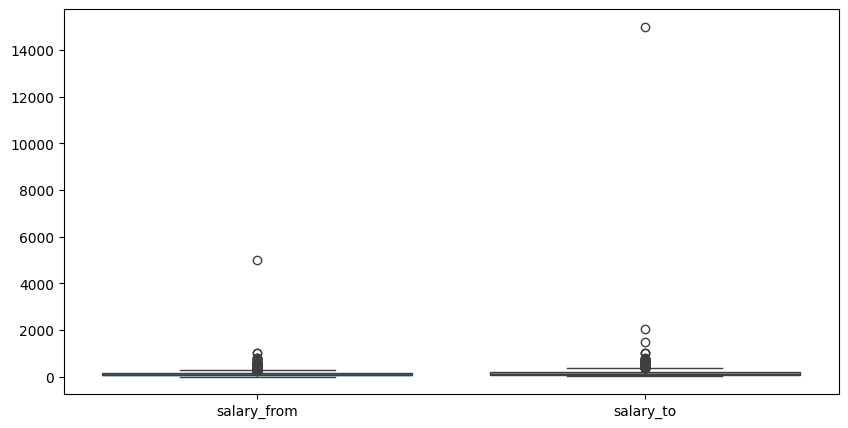

In [42]:
# get boxpolots of salary_from and salary_to,
# and see if we have outliers
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(data=merged_data[['salary_from', 'salary_to']])
plt.show()

now boxplots with upper outliers hidden

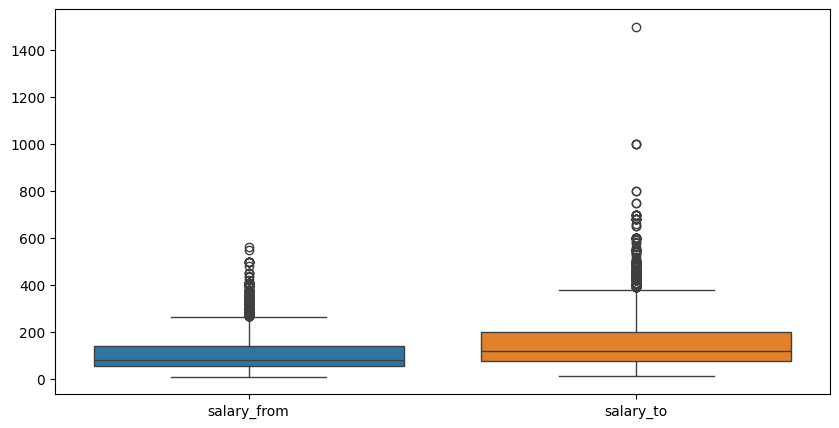

In [43]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=merged_data[(merged_data['salary_to'] < 2000)][['salary_from', 'salary_to']])
plt.show()

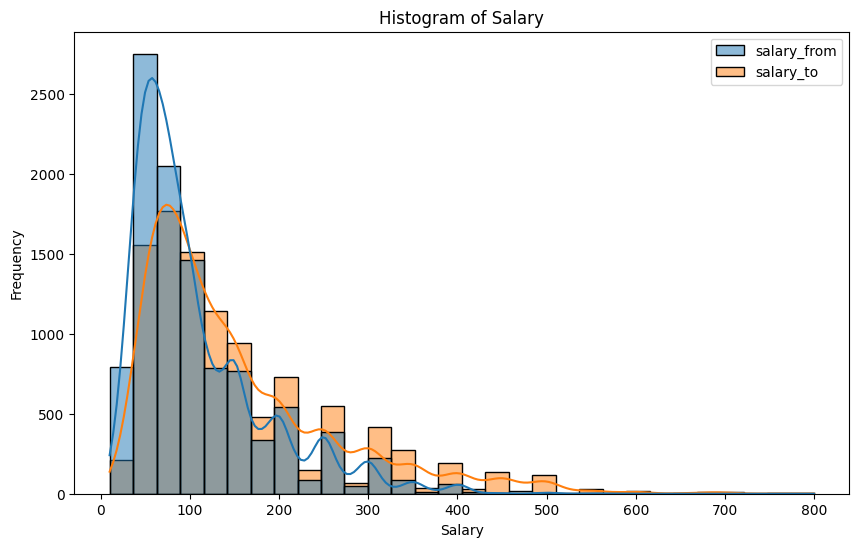

In [44]:
# get twop hist of salary_from and salary_to, add kde to get density plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(
    merged_data[(merged_data['salary_to'] < 1000)][['salary_from', 'salary_to']],
    kde=True, color='blue', bins=30, )
# sns.histplot(merged_data['salary_to'].dropna(), kde=True, color='red', bins=30)
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
# plt.legend(['Salary From', 'Salary To'])

plt.show()

#### Salary log-transform

In [45]:
# try log transformation for salary
import numpy as np

merged_data['log_salary_from'] = np.log(merged_data['salary_from'])
merged_data['log_salary_to'] = np.log(merged_data['salary_to'])

Mean log salary from: 4.516077191798067
Std log salary from: 0.6305547345204044
Mean log salary to: 4.803337964431696
Std log salary to: 0.6654669359074269


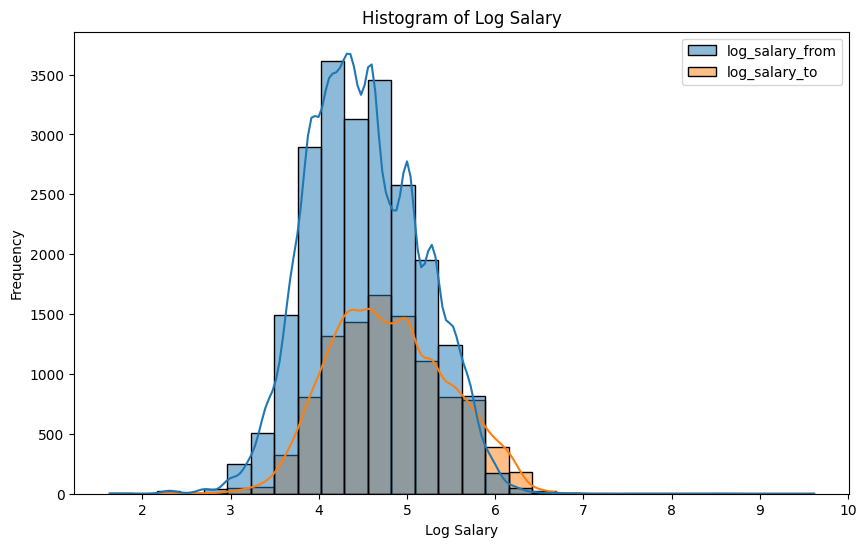

In [46]:
# also display mean and std as numbers in the legend, not lines
print('Mean log salary from:', merged_data['log_salary_from'].mean())
print('Std log salary from:', merged_data['log_salary_from'].std())
print('Mean log salary to:', merged_data['log_salary_to'].mean())
print('Std log salary to:', merged_data['log_salary_to'].std())

plt.figure(figsize=(10, 6))
sns.histplot(merged_data[['log_salary_from', 'log_salary_to']],
kde=True, color='blue', bins=30, 
)

plt.title('Histogram of Log Salary')
plt.xlabel('Log Salary')
plt.ylabel('Frequency') 
plt.show()

## Save as csv

In [47]:
merged_data.to_csv('../data/merged_data_getmatch_hh_unique_with_salary_rur_no_bottom_outliers_log_v2.csv', index=False)

# 2. Baseline

## Catboost

In [48]:
import pandas as pd

merged_data = pd.read_csv('../data/merged_data_getmatch_hh_unique_with_salary_rur_no_bottom_outliers_log_v2.csv')

In [49]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22224 entries, 0 to 22223
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 22224 non-null  object 
 1   location              22224 non-null  object 
 2   company               22224 non-null  object 
 3   skills                14384 non-null  object 
 4   grade                 1161 non-null   object 
 5   description           22224 non-null  object 
 6   salary_from           22224 non-null  float64
 7   salary_to             10423 non-null  float64
 8   currency              22224 non-null  object 
 9   source                22224 non-null  object 
 10  url                   22224 non-null  object 
 11  experience_from       21063 non-null  float64
 12  experience_to         21063 non-null  float64
 13  description_language  22224 non-null  object 
 14  log_salary_from       22224 non-null  float64
 15  log_salary_to      

In [50]:
merged_data.describe()

,salary_from,salary_to,experience_from,experience_to,log_salary_from,log_salary_to
count,22224.000000,10423.000000,21063.000000,21063.000000,22224.000000,10423.000000
mean,112.141964,154.019205,1.427669,3.054788,4.516077,4.803338
std,84.059810,183.853651,1.280363,2.088339,0.630555,0.665467
min,5.100000,11.000000,0.000000,-1.000000,1.629241,2.397895
25%,60.000000,75.000000,1.000000,3.000000,4.094345,4.317488
50%,90.000000,120.000000,1.000000,3.000000,4.499810,4.787492
75%,150.000000,200.000000,3.000000,3.000000,5.010635,5.298317
max,5000.000000,15000.000000,6.000000,6.000000,8.517193,9.615805


In [51]:
merged_data.nunique()

title                   12691
location                  631
company                 12157
skills                  13151
grade                       6
description             22224
salary_from               921
salary_to                 639
currency                    1
source                      2
url                     22224
experience_from             4
experience_to               4
description_language        1
log_salary_from           921
log_salary_to             639
dtype: int64

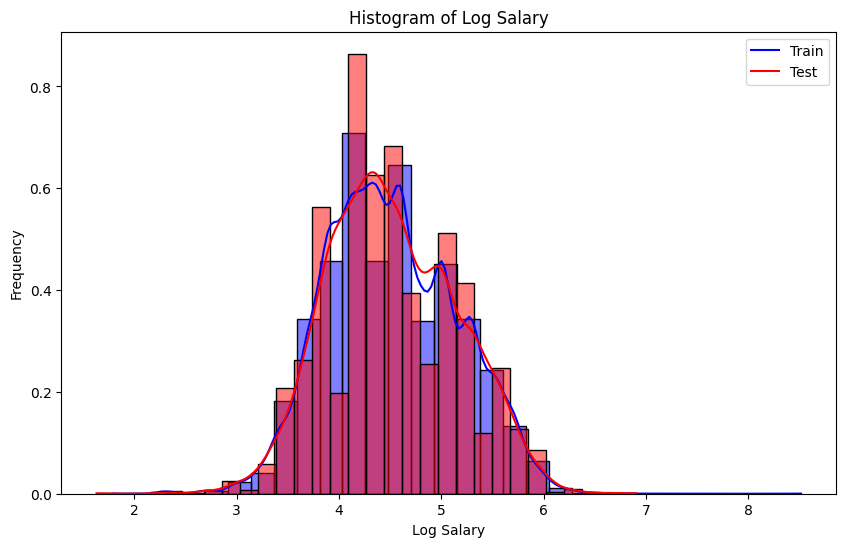

In [52]:
# check distribution of target in train and test to see if it is similar
# show distribution of target, with frequency normalized to 1

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split

X = merged_data[['title', 'location', 'company', 'description']]
y = merged_data['log_salary_from']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6))
sns.histplot(y_train, kde=True, color='blue', bins=30, stat='density')
sns.histplot(y_test, kde=True, color='red', bins=30, stat='density')

plt.title('Histogram of Log Salary')
plt.xlabel('Log Salary')
plt.ylabel('Frequency')
plt.legend(['Train', 'Test'])
plt.show()

In [11]:
def fit_predict(model, train_pool, test_pool, experiment_name):
    model.fit(train_pool, eval_set=test_pool)

    print('-'*50)
    # use subplots, also display best test metrics
    r2_test = model.evals_result_['validation']['R2']
    best_iteration = np.argmax(r2_test)
    best_r2 = np.max(r2_test)
    print(f'R2: {best_r2:.4f} at iteration {best_iteration}')

    mae_test = model.evals_result_['validation']['MAE']
    best_iteration = np.argmin(mae_test)
    best_mae = np.min(mae_test)
    print(f'MAE: {best_mae:.4f} at iteration {best_iteration}')
    print('-'*50)


    fig, axs = plt.subplots(2, 1, figsize=(10, 12))
    fig.suptitle(experiment_name)

    axs[0].plot(model.evals_result_['learn']['MAE'], label='train')
    axs[0].plot(model.evals_result_['validation']['MAE'], label='test')
    axs[0].set(xlabel='Iteration', ylabel='MAE')
    axs[0].legend()

    axs[1].plot(model.evals_result_['learn']['R2'], label='train')
    axs[1].plot(model.evals_result_['validation']['R2'], label='test')
    axs[1].set(xlabel='Iteration', ylabel='R2')
    axs[1].legend()

    plt.show()

### Baseline data + raw non-log salary

0:	learn: 0.0665293	test: 0.0665437	best: 0.0665437 (0)	total: 1.38s	remaining: 6m 54s
50:	learn: 0.5948437	test: 0.4573896	best: 0.4573896 (50)	total: 1m 16s	remaining: 6m 12s
100:	learn: 0.6937663	test: 0.5346961	best: 0.5346961 (100)	total: 2m 28s	remaining: 4m 52s
150:	learn: 0.7438332	test: 0.5704854	best: 0.5704854 (150)	total: 3m 41s	remaining: 3m 38s
200:	learn: 0.7765592	test: 0.5888716	best: 0.5888716 (200)	total: 5m 2s	remaining: 2m 28s
250:	learn: 0.8019843	test: 0.6015026	best: 0.6015026 (250)	total: 6m 24s	remaining: 1m 15s
299:	learn: 0.8219095	test: 0.6106406	best: 0.6106406 (299)	total: 7m 46s	remaining: 0us

bestTest = 0.6106406358
bestIteration = 299

--------------------------------------------------
R2: 0.6106 at iteration 299
MAE: 31.9148 at iteration 299
--------------------------------------------------


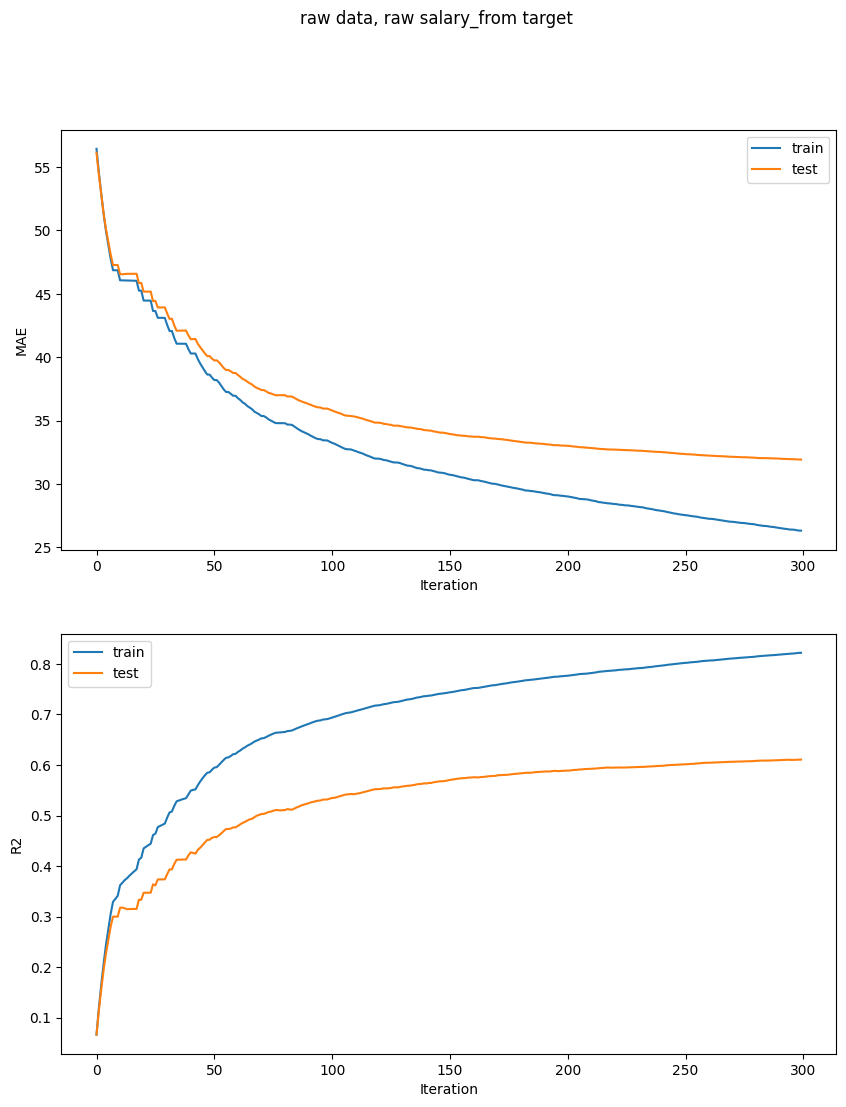

In [ ]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

experiment_name = 'raw data, raw salary_from target'

text_features = [
    'title',
    'location',
    'company',
    'description'
                 ]


X = merged_data[text_features]

y = merged_data['salary_from']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



train_pool = Pool(X_train, y_train, 
                  text_features=text_features
                  )
test_pool = Pool(X_test, y_test, 
                 text_features=text_features
                 )

model = CatBoostRegressor(
    iterations=300,
    # iterations=50,
    depth=10,
    learning_rate=0.1,
    loss_function='RMSE',
    verbose=50,
    eval_metric='R2',
    custom_metric=[
        'MAE',
        'R2',
        ]
    )

model.fit(train_pool, eval_set=test_pool)

print('-'*50)
# use subplots, also display best test metrics
r2_test = model.evals_result_['validation']['R2']
best_iteration = np.argmax(r2_test)
best_r2 = np.max(r2_test)
print(f'R2: {best_r2:.4f} at iteration {best_iteration}')

mae_test = model.evals_result_['validation']['MAE']
best_iteration = np.argmin(mae_test)
best_mae = np.min(mae_test)
print(f'MAE: {best_mae:.4f} at iteration {best_iteration}')
print('-'*50)


fig, axs = plt.subplots(2, 1, figsize=(10, 12))
fig.suptitle(experiment_name)

axs[0].plot(model.evals_result_['learn']['MAE'], label='train')
axs[0].plot(model.evals_result_['validation']['MAE'], label='test')
axs[0].set(xlabel='Iteration', ylabel='MAE')
axs[0].legend()

axs[1].plot(model.evals_result_['learn']['R2'], label='train')
axs[1].plot(model.evals_result_['validation']['R2'], label='test')
axs[1].set(xlabel='Iteration', ylabel='R2')
axs[1].legend()

plt.show()

### Baseline data + log salary (log salary used in all the downstream experiments)

0:	learn: 0.0723651	test: 0.0687769	best: 0.0687769 (0)	total: 1.96s	remaining: 9m 45s
50:	learn: 0.5893030	test: 0.5590664	best: 0.5590664 (50)	total: 1m 50s	remaining: 8m 57s
100:	learn: 0.6493493	test: 0.6103477	best: 0.6103477 (100)	total: 3m 38s	remaining: 7m 10s
150:	learn: 0.6959314	test: 0.6404033	best: 0.6404085 (149)	total: 5m 29s	remaining: 5m 25s
200:	learn: 0.7268692	test: 0.6550195	best: 0.6550195 (200)	total: 7m 18s	remaining: 3m 36s
250:	learn: 0.7501176	test: 0.6641029	best: 0.6641029 (250)	total: 9m 8s	remaining: 1m 47s
299:	learn: 0.7694975	test: 0.6711792	best: 0.6711792 (299)	total: 10m 46s	remaining: 0us

bestTest = 0.6711791502
bestIteration = 299

--------------------------------------------------
R2: 0.6712 at iteration 299
MAE: 0.2783 at iteration 299
--------------------------------------------------


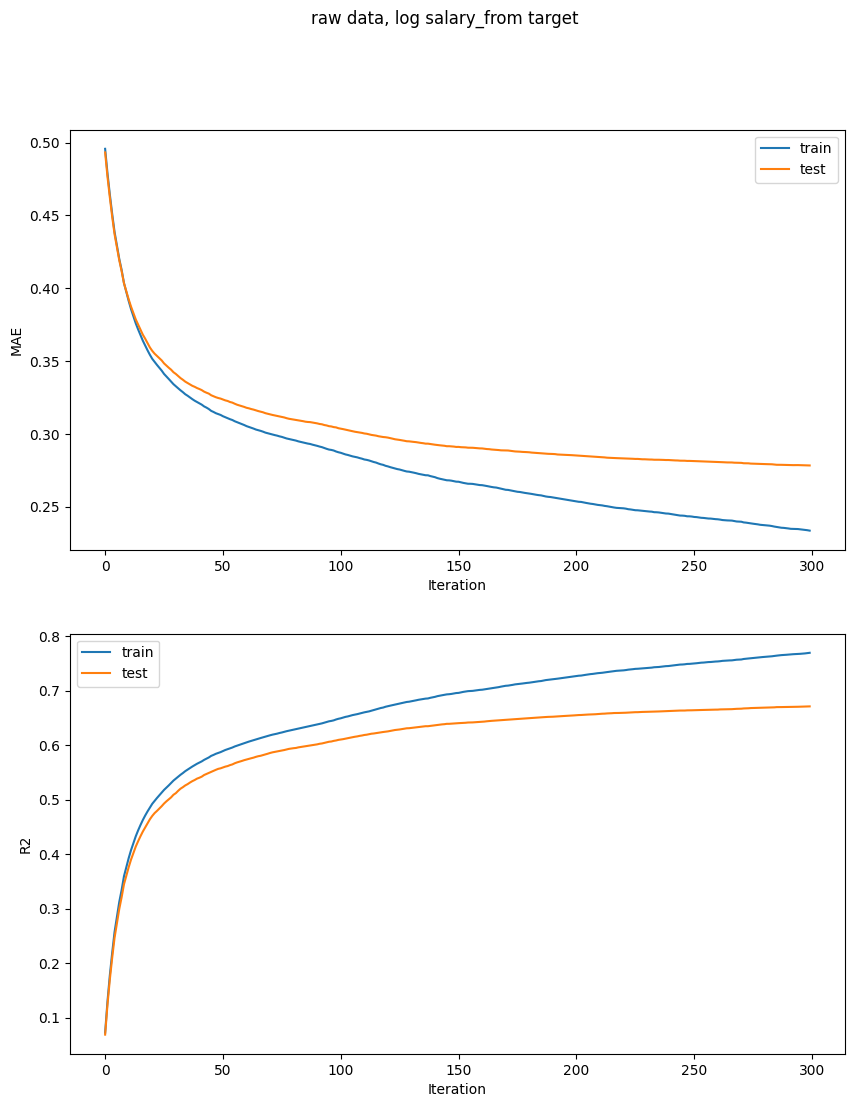

In [5]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

experiment_name = 'raw data, log salary_from target'

text_features = [
    'title',
                 'location',
                 'company',
                 'description'
                 ]

X = merged_data[text_features]

y = merged_data['log_salary_from']
# # make X noise
# X = np.random.rand(X.shape[0], 1000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



train_pool = Pool(X_train, y_train, 
                  text_features=text_features
                  )
test_pool = Pool(X_test, y_test, 
                 text_features=text_features
                 )

model = CatBoostRegressor(
    iterations=300,
    # iterations=50,
    depth=10,
    learning_rate=0.1,
    loss_function='RMSE',
    verbose=50,
    eval_metric='R2',
    custom_metric=[
        'MAE',
        'R2',
        ]
    )

model.fit(train_pool, eval_set=test_pool)

print('-'*50)
# use subplots, also display best test metrics
r2_test = model.evals_result_['validation']['R2']
best_iteration = np.argmax(r2_test)
best_r2 = np.max(r2_test)
print(f'R2: {best_r2:.4f} at iteration {best_iteration}')

mae_test = model.evals_result_['validation']['MAE']
best_iteration = np.argmin(mae_test)
best_mae = np.min(mae_test)
print(f'MAE: {best_mae:.4f} at iteration {best_iteration}')
print('-'*50)


fig, axs = plt.subplots(2, 1, figsize=(10, 12))
fig.suptitle(experiment_name)

axs[0].plot(model.evals_result_['learn']['MAE'], label='train')
axs[0].plot(model.evals_result_['validation']['MAE'], label='test')
axs[0].set(xlabel='Iteration', ylabel='MAE')
axs[0].legend()

axs[1].plot(model.evals_result_['learn']['R2'], label='train')
axs[1].plot(model.evals_result_['validation']['R2'], label='test')
axs[1].set(xlabel='Iteration', ylabel='R2')
axs[1].legend()

plt.show()

### Remove salaries from job descriptions

there may be jobs where description (feature) contains salary values, lets remove them

In [ ]:
import re

def replace_large_numbers(text, replacement='[NUMBER]'):
    # Regular expression to match numbers from 100,000 to 999,999,999 with optional spaces between thousands
    pattern = re.compile(r'\b\d{1,3}( )?\d{3}( )?\d{3}\b|\b\d{3}( )?\d{3}\b')
    return pattern.sub(replacement, text)

# Example usage
text = "The population of the city is 1 234 567  and 1234567 and 123456 and the budget is 12 345 678. The 2024 small 1000 town has 1234 people and 10000 10 000 but 100000 and 100 000."
replaced_text = replace_large_numbers(text)
print(replaced_text)

The population of the city is [NUMBER]  and [NUMBER] and [NUMBER] and the budget is [NUMBER]. The 2024 small 1000 town has 1234 people and 10000 10 000 but [NUMBER] and [NUMBER].


In [57]:
merged_data['description_no_numbers'] = merged_data['description'].apply(replace_large_numbers)

In [58]:
merged_data[merged_data['description'] != merged_data['description_no_numbers']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1445 entries, 14 to 22220
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   1445 non-null   object 
 1   location                1445 non-null   object 
 2   company                 1445 non-null   object 
 3   skills                  939 non-null    object 
 4   grade                   55 non-null     object 
 5   description             1445 non-null   object 
 6   salary_from             1445 non-null   float64
 7   salary_to               753 non-null    float64
 8   currency                1445 non-null   object 
 9   source                  1445 non-null   object 
 10  url                     1445 non-null   object 
 11  experience_from         1390 non-null   float64
 12  experience_to           1390 non-null   float64
 13  description_language    1445 non-null   object 
 14  log_salary_from         1445 non-null   flo

In [59]:
print(merged_data[merged_data['description'] != merged_data['description_no_numbers']][['description']].iloc[2].values)

['Мы — финтех-компания, создаём онлайн-банк и другие сервисы для предпринимателей и предприятий. Ими пользуются более 600 000 клиентов, а создают больше 4 000 сотрудников в России и за границей.\nИщем ML Product Manager в Точку.\nНаша команда разрабатывает AI/ML-фичи для всех продуктов экосистемы Точки. Мы ищем возможности для роста с использованием данных и технологий, сами выдвигаем и проверяем гипотезы и берем в работу только те, в которые действительно верим.\nЧто делать\nНа этой позиции будет два направления работы\nВозглавлять кросс-функциональную команду, которая только начинает работу над созданием AI-ассистента в одной важной и специфической области.\nИскать и тестировать гипотезы в других продуктах экосистемы Точки, где можно использовать данные и технологии. Некоторые из этих гипотез перерастут в полноценные продукты, за развитие которых команда будет отвечать в дальнейшем.\nТы подойдёшь, если\nЕсть опыт создания новых или масштабирования существующих продуктов от 3 лет.\nДе

In [60]:
print(merged_data[merged_data['description'] != merged_data['description_no_numbers']][['description_no_numbers']].iloc[2].values)

['Мы — финтех-компания, создаём онлайн-банк и другие сервисы для предпринимателей и предприятий. Ими пользуются более [NUMBER] клиентов, а создают больше 4 000 сотрудников в России и за границей.\nИщем ML Product Manager в Точку.\nНаша команда разрабатывает AI/ML-фичи для всех продуктов экосистемы Точки. Мы ищем возможности для роста с использованием данных и технологий, сами выдвигаем и проверяем гипотезы и берем в работу только те, в которые действительно верим.\nЧто делать\nНа этой позиции будет два направления работы\nВозглавлять кросс-функциональную команду, которая только начинает работу над созданием AI-ассистента в одной важной и специфической области.\nИскать и тестировать гипотезы в других продуктах экосистемы Точки, где можно использовать данные и технологии. Некоторые из этих гипотез перерастут в полноценные продукты, за развитие которых команда будет отвечать в дальнейшем.\nТы подойдёшь, если\nЕсть опыт создания новых или масштабирования существующих продуктов от 3 лет.\nД

0:	learn: 0.0723651	test: 0.0687769	best: 0.0687769 (0)	total: 1.71s	remaining: 8m 32s
50:	learn: 0.5930539	test: 0.5609133	best: 0.5609133 (50)	total: 1m 24s	remaining: 6m 52s
100:	learn: 0.6530164	test: 0.6132750	best: 0.6132750 (100)	total: 2m 38s	remaining: 5m 12s
150:	learn: 0.6988148	test: 0.6427110	best: 0.6427110 (150)	total: 3m 52s	remaining: 3m 49s
200:	learn: 0.7302072	test: 0.6576993	best: 0.6576993 (200)	total: 5m 6s	remaining: 2m 30s
250:	learn: 0.7527945	test: 0.6658629	best: 0.6658629 (250)	total: 6m 19s	remaining: 1m 14s
299:	learn: 0.7703791	test: 0.6739946	best: 0.6739946 (299)	total: 7m 33s	remaining: 0us

bestTest = 0.6739946401
bestIteration = 299

--------------------------------------------------
R2: 0.6740 at iteration 299
MAE: 0.2781 at iteration 299
--------------------------------------------------


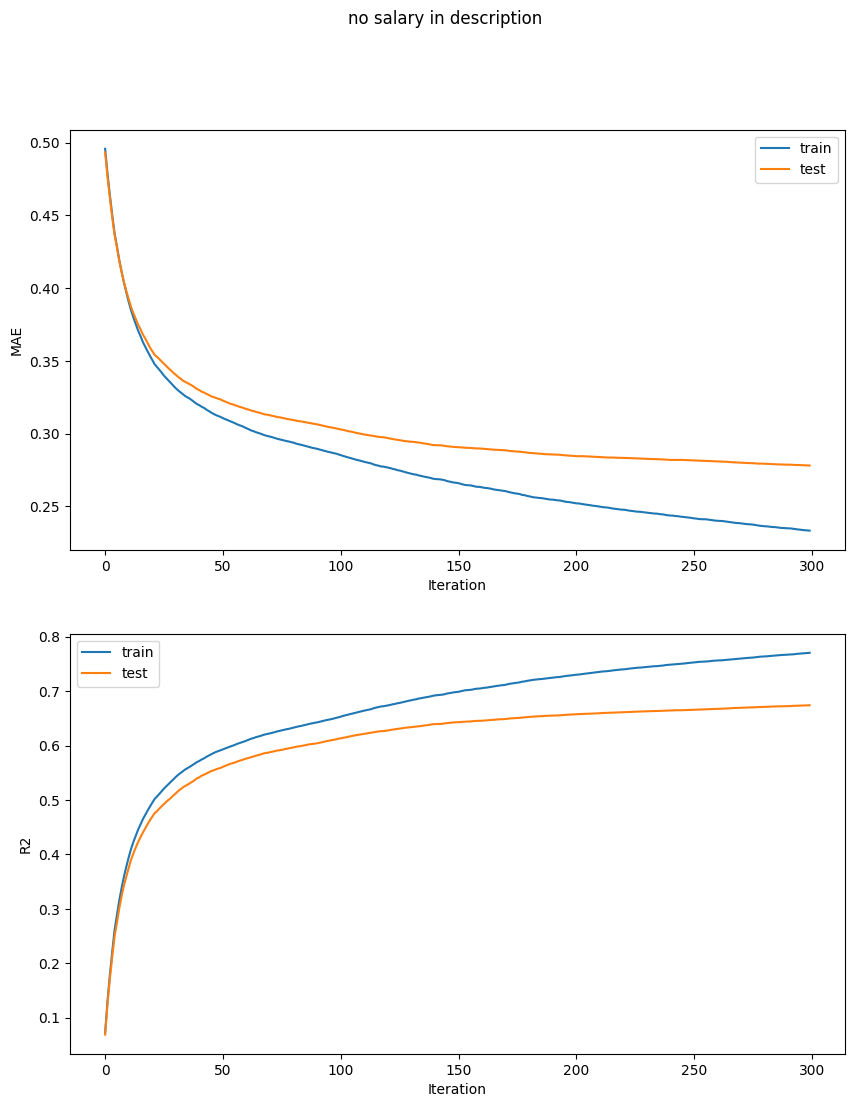

In [61]:
experiment_name = 'no salary in description'
text_features = [
    'title',
                 'location',
                 'company',
                 'description_no_numbers'
                 ]

X = merged_data[text_features]

y = merged_data['log_salary_from']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



train_pool = Pool(X_train, y_train, 
                  text_features=text_features
                  )
test_pool = Pool(X_test, y_test, 
                 text_features=text_features
                 )


model = CatBoostRegressor(
    iterations=300,
    # iterations=50,
    depth=10,
    learning_rate=0.1,
    loss_function='RMSE',
    verbose=50,
    eval_metric='R2',
    custom_metric=[
        'MAE',
        'R2',
        ]
    )

model.fit(train_pool, eval_set=test_pool)

print('-'*50)
# use subplots, also display best test metrics
r2_test = model.evals_result_['validation']['R2']
best_iteration = np.argmax(r2_test)
best_r2 = np.max(r2_test)
print(f'R2: {best_r2:.4f} at iteration {best_iteration}')

mae_test = model.evals_result_['validation']['MAE']
best_iteration = np.argmin(mae_test)
best_mae = np.min(mae_test)
print(f'MAE: {best_mae:.4f} at iteration {best_iteration}')
print('-'*50)


fig, axs = plt.subplots(2, 1, figsize=(10, 12))
fig.suptitle(experiment_name)

axs[0].plot(model.evals_result_['learn']['MAE'], label='train')
axs[0].plot(model.evals_result_['validation']['MAE'], label='test')
axs[0].set(xlabel='Iteration', ylabel='MAE')
axs[0].legend()

axs[1].plot(model.evals_result_['learn']['R2'], label='train')
axs[1].plot(model.evals_result_['validation']['R2'], label='test')
axs[1].set(xlabel='Iteration', ylabel='R2')
axs[1].legend()

plt.show()

# bestTest = 0.6535980838

### Add skills to the description

concatenate skills string with description string and use it a as a text feature

In [62]:
merged_data['description_no_numbers_with_skills'] = merged_data['description_no_numbers'] + ' ' + merged_data['skills'].fillna('')

0:	learn: 0.0725767	test: 0.0686084	best: 0.0686084 (0)	total: 1.35s	remaining: 6m 43s
50:	learn: 0.6043339	test: 0.5702874	best: 0.5702874 (50)	total: 1m 14s	remaining: 6m 5s
100:	learn: 0.6618218	test: 0.6202670	best: 0.6202670 (100)	total: 2m 27s	remaining: 4m 51s
150:	learn: 0.7054182	test: 0.6489623	best: 0.6489623 (150)	total: 3m 42s	remaining: 3m 39s
200:	learn: 0.7358487	test: 0.6628392	best: 0.6628392 (200)	total: 4m 55s	remaining: 2m 25s
250:	learn: 0.7572650	test: 0.6719156	best: 0.6719156 (250)	total: 6m 9s	remaining: 1m 12s
299:	learn: 0.7766903	test: 0.6790195	best: 0.6790195 (299)	total: 7m 22s	remaining: 0us

bestTest = 0.6790195324
bestIteration = 299

--------------------------------------------------
R2: 0.6790 at iteration 299
MAE: 0.2749 at iteration 299
--------------------------------------------------


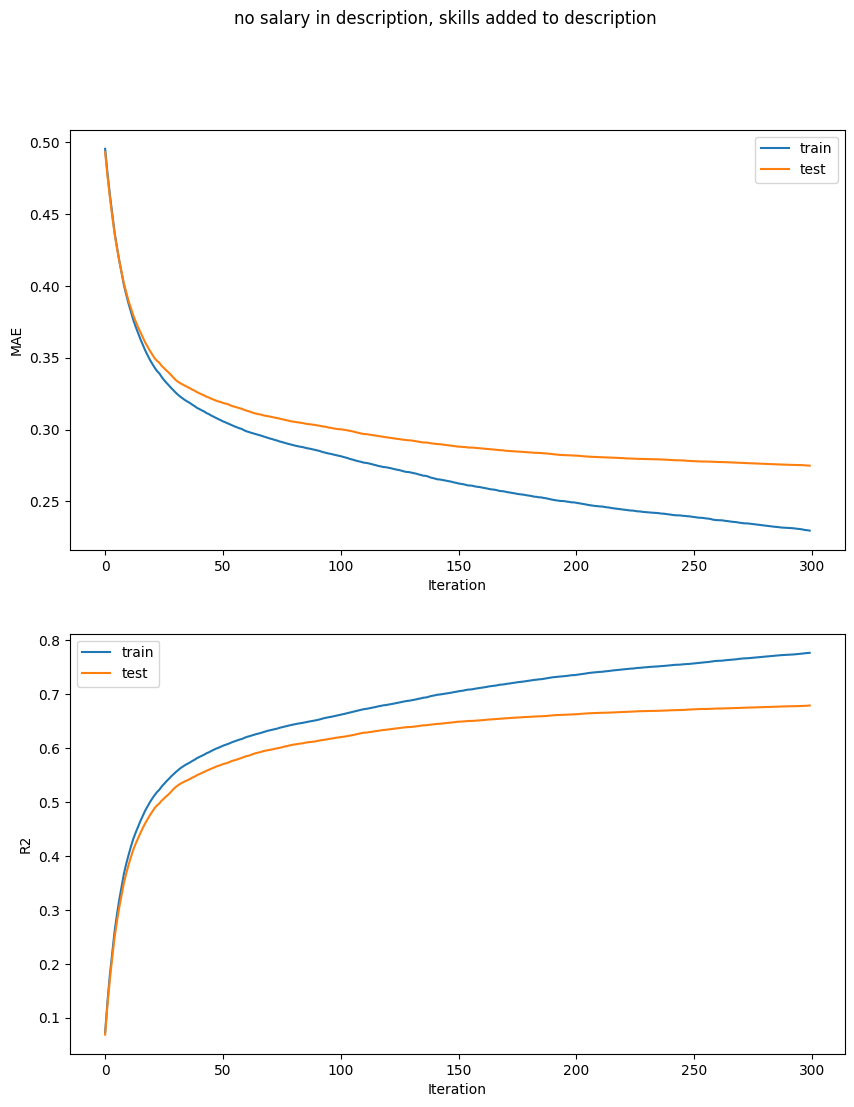

In [63]:
experiment_name = 'no salary in description, skills added to description'
text_features = [
    'title',
                 'location',
                 'company',
                 'description_no_numbers_with_skills'
                 ]

X = merged_data[text_features]
y = merged_data['log_salary_from']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



train_pool = Pool(X_train, y_train, 
                  text_features=text_features
                  )
test_pool = Pool(X_test, y_test, 
                 text_features=text_features
                 )


model = CatBoostRegressor(
    iterations=300,
    # iterations=50,
    depth=10,
    learning_rate=0.1,
    loss_function='RMSE',
    verbose=50,
    eval_metric='R2',
    custom_metric=[
        'MAE',
        'R2',
        ]
    )


fit_predict(model, train_pool, test_pool, experiment_name)

# bestTest = 0.6790195324

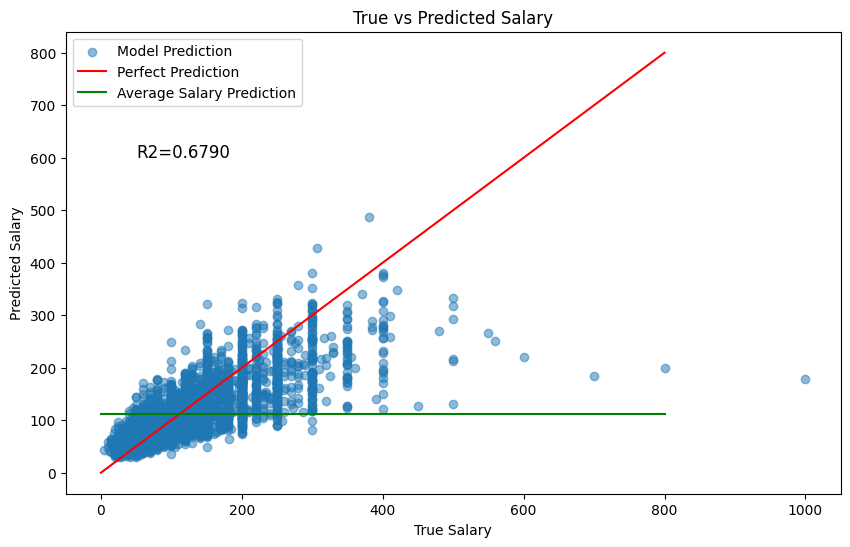

In [64]:
from sklearn.metrics import r2_score

# run model prediction on test data, and compare with actual values. transform back from log
# also, add a line that shows prediction by average salary
# also, add r2 score to the plot
y_pred = np.exp(model.predict(test_pool))
y_true = np.exp(y_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_true, y_pred, alpha=0.5, label='Model Prediction')

# add line for perfect prediction
plt.plot([0, 800], [0, 800], color='red', label='Perfect Prediction')

# add line for average salary
plt.plot([0, 800], [y_true.mean(), y_true.mean()], color='green', label='Average Salary Prediction')

plt.xlabel('True Salary')
plt.ylabel('Predicted Salary')
plt.title('True vs Predicted Salary')
# add r2 score
# r2 = r2_score(y_true, y_pred)
r2 = r2_score(y_test, model.predict(test_pool))
plt.text(50, 600, f'R2={r2:.4f}', fontsize=12)
plt.legend()
plt.show()


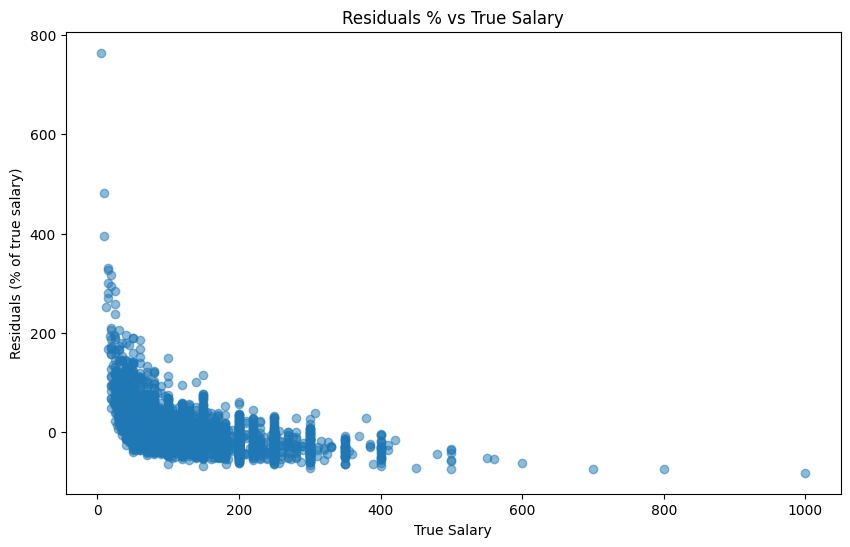

In [65]:
# plot residuals vs true salary
# residuals should be % of true salary
plt.figure(figsize=(10, 6))
plt.scatter(y_true, (y_pred - y_true) / y_true * 100, alpha=0.5)
plt.xlabel('True Salary')
plt.ylabel('Residuals (% of true salary)')
plt.title('Residuals % vs True Salary')
plt.show()


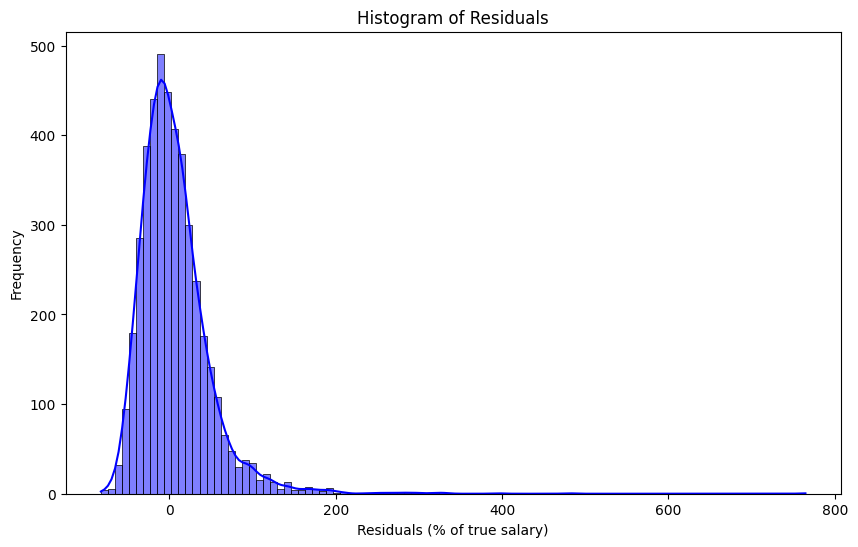

In [66]:
# get histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot((y_pred - y_true) / y_true * 100, kde=True, color='blue', bins=100)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals (% of true salary)')
plt.ylabel('Frequency')
plt.show()


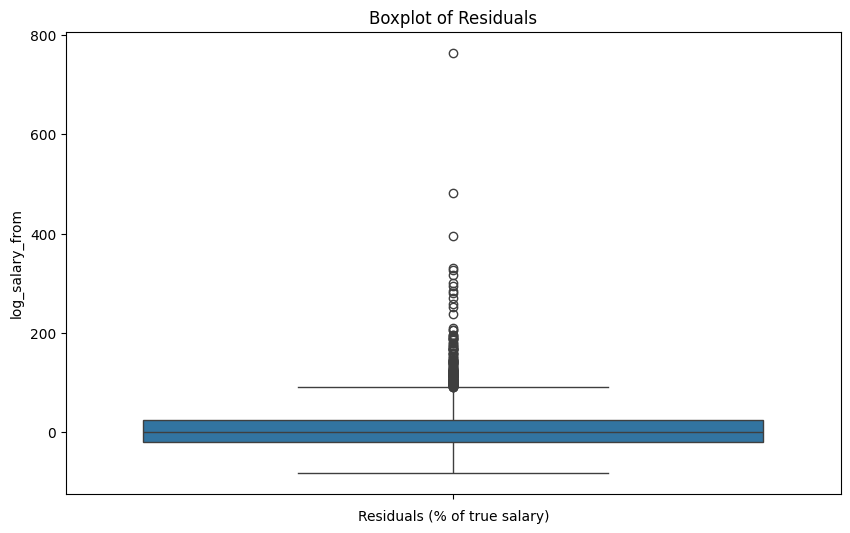

In [67]:
# get boxplot of residuals
plt.figure(figsize=(10, 6))
sns.boxplot((y_pred - y_true) / y_true * 100)
plt.title('Boxplot of Residuals')
plt.xlabel('Residuals (% of true salary)')
plt.show()


### Also use skills as a separate feature

on the top of that, use skills as a separate feature

In [68]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22224 entries, 0 to 22223
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   title                               22224 non-null  object 
 1   location                            22224 non-null  object 
 2   company                             22224 non-null  object 
 3   skills                              14384 non-null  object 
 4   grade                               1161 non-null   object 
 5   description                         22224 non-null  object 
 6   salary_from                         22224 non-null  float64
 7   salary_to                           10423 non-null  float64
 8   currency                            22224 non-null  object 
 9   source                              22224 non-null  object 
 10  url                                 22224 non-null  object 
 11  experience_from                     21063

In [69]:
merged_data['skills'] = merged_data['skills'].fillna('')

In [70]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22224 entries, 0 to 22223
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   title                               22224 non-null  object 
 1   location                            22224 non-null  object 
 2   company                             22224 non-null  object 
 3   skills                              22224 non-null  object 
 4   grade                               1161 non-null   object 
 5   description                         22224 non-null  object 
 6   salary_from                         22224 non-null  float64
 7   salary_to                           10423 non-null  float64
 8   currency                            22224 non-null  object 
 9   source                              22224 non-null  object 
 10  url                                 22224 non-null  object 
 11  experience_from                     21063

0:	learn: 0.0692137	test: 0.0653584	best: 0.0653584 (0)	total: 1.76s	remaining: 8m 47s
50:	learn: 0.6029070	test: 0.5733399	best: 0.5733399 (50)	total: 1m 39s	remaining: 8m 3s
100:	learn: 0.6586820	test: 0.6212289	best: 0.6212289 (100)	total: 3m 14s	remaining: 6m 22s
150:	learn: 0.7025440	test: 0.6494292	best: 0.6494292 (150)	total: 4m 49s	remaining: 4m 45s
200:	learn: 0.7326008	test: 0.6632766	best: 0.6632766 (200)	total: 6m 24s	remaining: 3m 9s
250:	learn: 0.7560738	test: 0.6717604	best: 0.6717604 (250)	total: 8m 23s	remaining: 1m 38s
299:	learn: 0.7742653	test: 0.6785696	best: 0.6785696 (299)	total: 10m 24s	remaining: 0us

bestTest = 0.6785696198
bestIteration = 299

--------------------------------------------------
R2: 0.6786 at iteration 299
MAE: 0.2758 at iteration 299
--------------------------------------------------


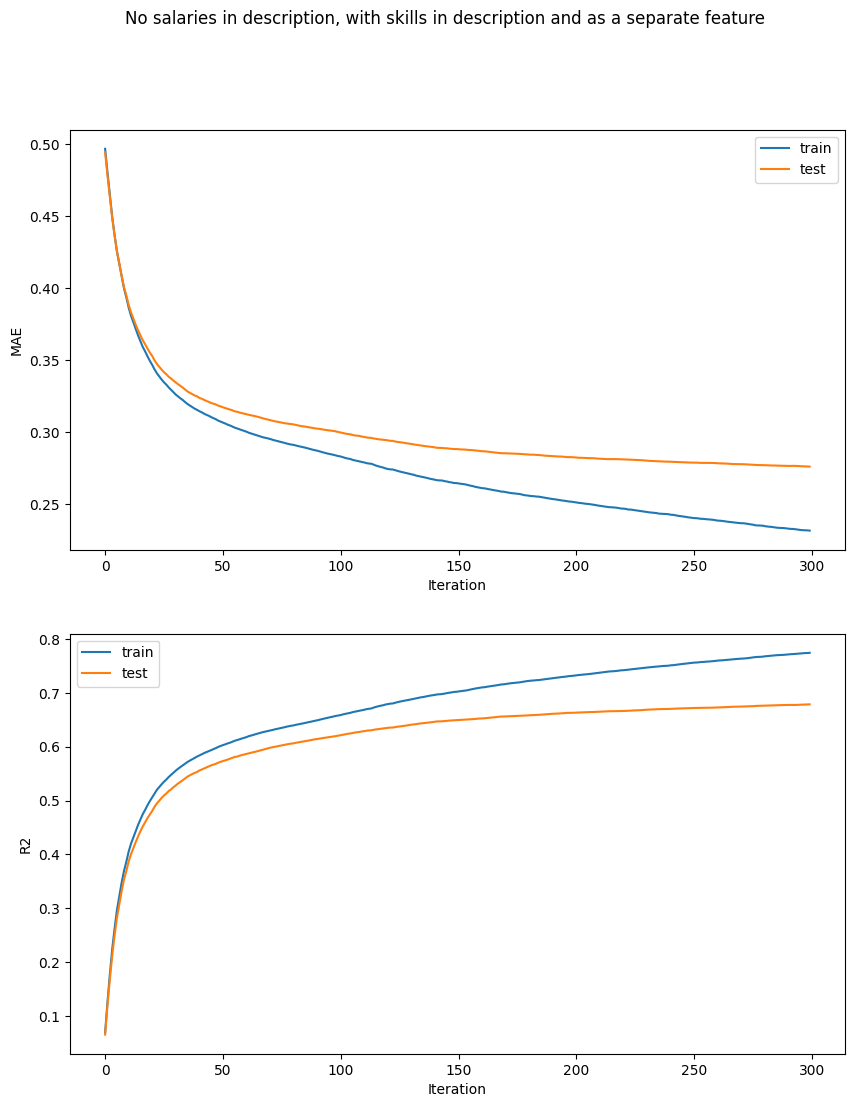

In [71]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

experiment_name = 'No salaries in description, with skills in description and as a separate feature'

text_features = [
'title',
'location',
'company',
'description_no_numbers_with_skills',
'skills'
]

features = text_features

X = merged_data[features]

y = merged_data['log_salary_from']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_pool = Pool(X_train, y_train, 
                  text_features=text_features
                  )
test_pool = Pool(X_test, y_test, 
                 text_features=text_features
                 )

model = CatBoostRegressor(
    iterations=300,
    depth=10,
    learning_rate=0.1,
    loss_function='RMSE',
    verbose=50,
    eval_metric='R2',
    custom_metric=[
        'MAE',
        'R2',
        ]
    )


fit_predict(model, train_pool, test_pool, experiment_name)

# bestTest = 0.6785696198

### Extract experience years

#### Regex to extract years

In [72]:
import re

test_cases = [
    "Опыт в автоматизации тестирования от 1-го года",
    "Опыт в автоматизации тестирования от года",
    "Опыт в автоматизации тестирования до года",
    "Опыт в автоматизации тестирования менее года",
    "Опыт в автоматизации тестирования более года",
    "Опыт работы от 2-х до 5-и лет",
    "Опыт работы от 2033-х до 50-и лет",
    "От 1-го до 2-х года",
    "Требуется опыт от 3-х до 7-и лет работы",
    "Опыт от 1 до 3 лет",
    "Опыт разработки на Java от 3 лет.",
    "Опыт работы 3–6 лет.",
    "3+ года опыта работы Backend-разработчиком с нашим стеком.",
    "Опыт в автоматизации тестирования от 1-го года на Python + PyTest, Allure, а также аналогичный опыт автоматизации на JS.",
    "2+ года опыта проведение академических или индустриальных исследований.",
    "Опыт разработки на Java от 3 лет.",
    "Имеете опыт работы от 3 лет.",
    "Опыт разработки на платформе .NET 4–5 лет, желательно .NET Core.",
    "Опыт в сфере бизнес-/системного анализа от 3 лет.",
    "Опыт разработки на Java от 6 лет.",
    "Опыт работы 3–6 лет.",
    "Опыт работы на позиции руководителя проектов направления аналитики данных либо тимлида в части разработки/внедрения или эксплуатации BI-систем от 2 лет.",
    "Опыт разработки на Python от 5 лет.",
    "Имеете опыт работы от 3 лет.",
    "Опыт функционального тестирования от года.",
    "У вас есть опыт работы в качестве автоматизатора тестирования/SDET от 2 лет.",
    "Опыт работы лидом в командах аналитики от 1 года (команда от 2 человек), опыт найма и развития сотрудников.",
    "3+ года опыта работы Backend-разработчиком с нашим стеком.",
    "2+ года опыта проведение академических или индустриальных исследований, включая обзор литературы.",
    "Опыт в автоматизации тестирования от 1-го года на Python + PyTest, Allure, а также аналогичный опыт автоматизации на JS.",
    "Опыт в рекрутменте от 1 года (in-house или в агентстве).",
    """Ожидания
Опыт разработки на Java от 3 лет.
Опыт коммерческой разработки на Java 11+ или Kotlin.""",
"""частвовать в обсуждении и анализе результатов.
Что нужно, чтобы к нам присоединиться
Опыт разработки на Python от четырех лет. Идеально, если есть опыт работы с бэкендом.
Знание основ Computer Science: структуры данных, базовые алгоритмы, вычислительная сложность.
Понимание основных принципов и алгоритмов машинного обучения.
Опыт проектирования сис""",
"""Ожидания
Опыт работы: более 6-ти лет.
Обязателен опыт работы в AdTech и знания основных понятий и концепций AdTech / Programmatic (механики аукционов, механики атрибуции, управления ставками и стоимостями, способы учета конверсий, Fingerprinting и идентификация пользователей, способы построения моделей оценки CTR, CvR).
Хорошее знание математики (линейная алгебра, математическая статистика, линейное программирование), алгоритмы.
Уверенное владение Python.""",
"""боту.
Проектировать и внедрять отказоустойчивую архитектуру приложений.
Договариваться с коллегами и находить лучшие решения для проекта.
Требования
Имеете опыт работы от 3–х лет.
Умеете работать с Linux на уровне системного администратора.
Уверенно владеете одним из языков программирования: Go, C#, Python, Java и другие.
Понимаете принципы построени""",
"""ботки с помощью C# и SQL в production.
Знание BCL/CLR.
Навыки написания чистого кода и понимание шаблонов архитектуры.
Опыт работы от 2х лет.
Станет плюсом
Знание SQL Server, Kafka, RabbitMQ, Prometheus, Cassandra, Kubernetes, ClickHouse.
Условия
Свобода выбирать м""",
""" командами менеджеров, аналитиков и разработчиков.
Ожидания
Имеете опыт промышленного применения ML больше года.
Программировали на Python, работали с Numpy, Pandas.
Работали с большими данными и хорошо знаете один из диалектов SQL.
Готовы предлагать идеи и самостоятельно их реализовывать.
Знаете основы алгоритмов и структур данных.
Будет плюсом:""",
"""зация тестовых артефактов.
Требования
Опыт в качестве инженера нагрузочного тестирования от 6 месяцев.
Написание / актуализация методики нагрузочного тестирования.
Проведение тестов."""
]

def extract_numbers(text):
    text = text.replace('ё', 'е').replace('–', '-')
    # Patterns to be replaced with numbers
    patterns_to_replace = [
        r'(от\s*)год(а)',
        r'(до\s*)год(а)',
        r'(более\s*)год(а)',
        r'(больше\s*)год(а)',
        r'(менее\s*)год(а)',
    ]

    # Replace patterns with numbers
    for pattern in patterns_to_replace:
        text = re.sub(pattern, r'\g<1>1 год', text, flags=re.IGNORECASE)
    
    # Patterns to be replaced with numbers v2
    patterns_to_replace = {
        1: [r'один', r"одного", r"одним"],
        2: ['два', "двух", "двум", "двумя", "полутора", "полтора"],
        3: ['три', "трех", "трем", "тремя"],
        4: ['четыре', "четырех", "четырьмя"],
        5: ['пять', "пяти", "пятью"],
        6: ['шесть', "шести", "шестью"],
        7: ['семь', "семи", "семью"],
        8: ['восемь', "восьми", "восемью",],
        9: ['девять', "девяти", "девятью"],
        10: ['десять', "десяти","десятью",],

    }

    for number, patterns in patterns_to_replace.items():
        new_patterns = []
        for pattern in patterns:
            new_patterns.append(pattern + r'\W')
        patterns_to_replace[number] = new_patterns


    for number, words in patterns_to_replace.items():
        for word in words:
            text = re.sub(word, str(number) + ' ', text, flags=re.IGNORECASE)

    # pattern for months
    text = re.sub(r'\d{1,2}\s{0,2}месяц', '1 год', text, flags=re.IGNORECASE)
    # patterns for numbers 2x to xxxx

    patterns_to_replace = [
        r'[2-9]\d{1,3}',
    ]

    for pattern in patterns_to_replace:
        text = re.sub(pattern, r'', text, flags=re.IGNORECASE)
    
    # print(text)


    # Patterns for different number formats
    patterns = [
        # Pattern for "от года" (implicit 1)
        r'от\s*года',

        # Pattern for ranges with "от" and "до"
        r'(?:(от|более|не менее)\s{0,5})(\d{1,2})(?:-(?:го|й|х|и|ти))?(?:\s*(?:до|–|-)\s*(\d{1,2})(?:-(?:го|й|х|и))?)',
        
        # Pattern for "от X года/лет"
        r'(?:(от|более|не менее)\s{0,5})(\d{1,2})\s{0,5}(год|лет)',
        
        
        # Pattern for X+ years
        # r'(\d{1,2})\+\s*(?:года?|лет)',
        r'(\d{1,2})\+\s{0,5}(год|лет)',
        
        # Simple number with optional suffix
        r'(\d{1,2})(?:-?(?:го|й|х|и|ти))?\s*(год|лет)'
    ]
    
    # Combine results from all patterns
    all_matches = []
    for pattern in patterns:
        matches = re.findall(pattern, text, re.IGNORECASE)
        all_matches.extend([match for match in matches if match])
    # flatten list of tuples
    all_matches = set([item for sublist in all_matches for item in sublist])
    # replace all \D with ''
    all_matches = [re.sub(r'\D', '', match) for match in all_matches]
    all_matches = list(filter(lambda x: len(x) > 0, all_matches))
    all_matches = [int(match) for match in all_matches]
    if len(all_matches) == 0:
        return None, None
    if max(all_matches) == min(all_matches):
        return min(all_matches), -1
    return min(all_matches), max(all_matches)
    
    # return all_matches


for text in test_cases:
    print(f"Text: {text}")
    print(f"Extracted numbers: {extract_numbers(text)}\n")

Text: Опыт в автоматизации тестирования от 1-го года
Extracted numbers: (1, -1)

Text: Опыт в автоматизации тестирования от года
Extracted numbers: (1, -1)

Text: Опыт в автоматизации тестирования до года
Extracted numbers: (1, -1)

Text: Опыт в автоматизации тестирования менее года
Extracted numbers: (1, -1)

Text: Опыт в автоматизации тестирования более года
Extracted numbers: (1, -1)

Text: Опыт работы от 2-х до 5-и лет
Extracted numbers: (2, 5)

Text: Опыт работы от 2033-х до 50-и лет
Extracted numbers: (None, None)

Text: От 1-го до 2-х года
Extracted numbers: (1, 2)

Text: Требуется опыт от 3-х до 7-и лет работы
Extracted numbers: (3, 7)

Text: Опыт от 1 до 3 лет
Extracted numbers: (1, 3)

Text: Опыт разработки на Java от 3 лет.
Extracted numbers: (3, -1)

Text: Опыт работы 3–6 лет.
Extracted numbers: (6, -1)

Text: 3+ года опыта работы Backend-разработчиком с нашим стеком.
Extracted numbers: (3, -1)

Text: Опыт в автоматизации тестирования от 1-го года на Python + PyTest, Allure

In [73]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22224 entries, 0 to 22223
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   title                               22224 non-null  object 
 1   location                            22224 non-null  object 
 2   company                             22224 non-null  object 
 3   skills                              22224 non-null  object 
 4   grade                               1161 non-null   object 
 5   description                         22224 non-null  object 
 6   salary_from                         22224 non-null  float64
 7   salary_to                           10423 non-null  float64
 8   currency                            22224 non-null  object 
 9   source                              22224 non-null  object 
 10  url                                 22224 non-null  object 
 11  experience_from                     21063

In [74]:
# add only to Nan values
empty_experience_mask = merged_data['experience_from'].isna()
merged_data.loc[empty_experience_mask, 'experience_from'] = merged_data.loc[empty_experience_mask, 'description'].apply(lambda x: extract_numbers(x)[0])
merged_data.loc[empty_experience_mask, 'experience_to'] = merged_data.loc[empty_experience_mask, 'description'].apply(lambda x: extract_numbers(x)[1])

In [75]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22224 entries, 0 to 22223
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   title                               22224 non-null  object 
 1   location                            22224 non-null  object 
 2   company                             22224 non-null  object 
 3   skills                              22224 non-null  object 
 4   grade                               1161 non-null   object 
 5   description                         22224 non-null  object 
 6   salary_from                         22224 non-null  float64
 7   salary_to                           10423 non-null  float64
 8   currency                            22224 non-null  object 
 9   source                              22224 non-null  object 
 10  url                                 22224 non-null  object 
 11  experience_from                     22091

How many with experience empty?

In [76]:
empty_experience_mask = merged_data['experience_from'].isna()
empty_experience_mask.sum()

133

How many with experience and grade empty?

In [77]:
empty_experience_mask = merged_data['experience_from'].isna()
empty_grade_mask = merged_data['grade'].isna()
empty_experience_grade_mask = empty_experience_mask & empty_grade_mask
empty_experience_grade_mask.sum()

0

#### Infer from grade info

if grade is not empty and experience is not empty, get median experience_from and experience_to for each grade

In [ ]:
empty_experience_mask = merged_data['experience_from'].isna()
empty_grade_mask = merged_data['grade'].isna()
grouped_by_grade = merged_data[~empty_experience_mask & ~empty_grade_mask].groupby('grade')[['experience_from', 'experience_to']].median()
grouped_by_grade

,experience_from,experience_to
grade,,
C-level,4.5,-1.0
Junior,1.0,-1.0
Lead,3.0,-1.0
Middle,2.0,-1.0
Middle-to-Senior,3.0,-1.0
Senior,3.0,-1.0


using values from grouped_by_grade, fill in missing values for experience_from and experience_to for each grade in merged_data

In [ ]:
empty_experience_mask = merged_data['experience_from'].isna()
for grade, (experience_from, experience_to) in grouped_by_grade.iterrows():
    mask = (merged_data['grade'] == grade) & empty_experience_mask
    merged_data.loc[mask, 'experience_from'] = experience_from
    merged_data.loc[mask, 'experience_to'] = experience_to

How many with experience empty?

In [80]:
empty_experience_mask = merged_data['experience_from'].isna()
empty_experience_mask.sum()

0

In [81]:
merged_data.describe()

,salary_from,salary_to,experience_from,experience_to,log_salary_from,log_salary_to
count,22224.000000,10423.000000,22224.000000,22224.000000,22224.000000,10423.000000
mean,112.141964,154.019205,1.513836,2.917432,4.516077,4.803338
std,84.059810,183.853651,1.354012,2.218699,0.630555,0.665467
min,5.100000,11.000000,0.000000,-1.000000,1.629241,2.397895
25%,60.000000,75.000000,1.000000,3.000000,4.094345,4.317488
50%,90.000000,120.000000,1.000000,3.000000,4.499810,4.787492
75%,150.000000,200.000000,3.000000,3.000000,5.010635,5.298317
max,5000.000000,15000.000000,10.000000,18.000000,8.517193,9.615805


In [82]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22224 entries, 0 to 22223
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   title                               22224 non-null  object 
 1   location                            22224 non-null  object 
 2   company                             22224 non-null  object 
 3   skills                              22224 non-null  object 
 4   grade                               1161 non-null   object 
 5   description                         22224 non-null  object 
 6   salary_from                         22224 non-null  float64
 7   salary_to                           10423 non-null  float64
 8   currency                            22224 non-null  object 
 9   source                              22224 non-null  object 
 10  url                                 22224 non-null  object 
 11  experience_from                     22224

#### A. Use only lower experience bound

0:	learn: 0.0942699	test: 0.0930319	best: 0.0930319 (0)	total: 1.84s	remaining: 9m 11s
50:	learn: 0.6622494	test: 0.6382652	best: 0.6382652 (50)	total: 1m 35s	remaining: 7m 47s
100:	learn: 0.7025235	test: 0.6694159	best: 0.6694159 (100)	total: 3m 6s	remaining: 6m 6s
150:	learn: 0.7396992	test: 0.6892543	best: 0.6892543 (150)	total: 4m 35s	remaining: 4m 31s
200:	learn: 0.7670509	test: 0.7008148	best: 0.7008148 (200)	total: 6m 6s	remaining: 3m
250:	learn: 0.7847084	test: 0.7070743	best: 0.7070743 (250)	total: 7m 35s	remaining: 1m 28s
299:	learn: 0.8009438	test: 0.7118350	best: 0.7118350 (299)	total: 9m 2s	remaining: 0us

bestTest = 0.7118350342
bestIteration = 299

--------------------------------------------------
R2: 0.7118 at iteration 299
MAE: 0.2591 at iteration 299
--------------------------------------------------


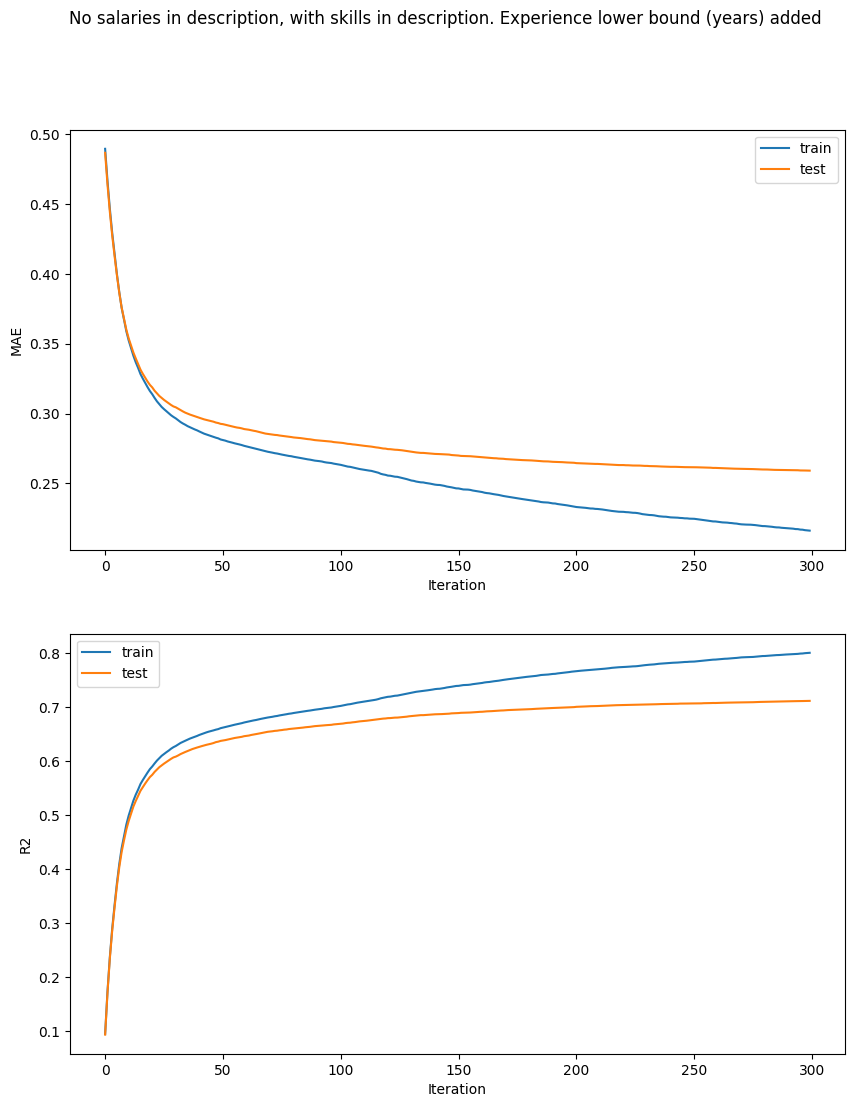

In [ ]:
from catboost import CatBoostRegressor, Pool

experiment_name = 'No salaries in description, with skills in description. Experience lower bound (years) added'

text_features = [
'title',
'location',
'company',
'description_no_numbers_with_skills'
]

features = text_features + ['experience_from']

X = merged_data[features]

y = merged_data['log_salary_from']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_pool = Pool(X_train, y_train, 
                  text_features=text_features
                  )
test_pool = Pool(X_test, y_test, 
                 text_features=text_features
                 )

model = CatBoostRegressor(
    iterations=300,
    depth=10,
    learning_rate=0.1,
    loss_function='RMSE',
    verbose=50,
    eval_metric='R2',
    custom_metric=[
        'MAE',
        'R2',
        ]
    )


fit_predict(model, train_pool, test_pool, experiment_name)

#### B. Use both experience bounds

How to deal with jobs where upper bound is not given?

Try setting it to 10

In [84]:
merged_data['experience_to_adjusted_10'] = merged_data['experience_to']
merged_data['experience_to_adjusted_10'] = merged_data['experience_to_adjusted_10'].apply(lambda x: 10 if x == -1 else x)

0:	learn: 0.0964290	test: 0.0958440	best: 0.0958440 (0)	total: 2.02s	remaining: 10m 3s
50:	learn: 0.6658168	test: 0.6449792	best: 0.6449792 (50)	total: 1m 31s	remaining: 7m 27s
100:	learn: 0.7052497	test: 0.6735532	best: 0.6735532 (100)	total: 3m	remaining: 5m 55s
150:	learn: 0.7435991	test: 0.6941239	best: 0.6941239 (150)	total: 4m 30s	remaining: 4m 26s
200:	learn: 0.7672974	test: 0.7049744	best: 0.7049744 (200)	total: 5m 59s	remaining: 2m 56s
250:	learn: 0.7877633	test: 0.7118475	best: 0.7118475 (250)	total: 7m 29s	remaining: 1m 27s
299:	learn: 0.8031332	test: 0.7161314	best: 0.7161314 (299)	total: 8m 56s	remaining: 0us

bestTest = 0.7161314242
bestIteration = 299

--------------------------------------------------
R2: 0.7161 at iteration 299
MAE: 0.2566 at iteration 299
--------------------------------------------------


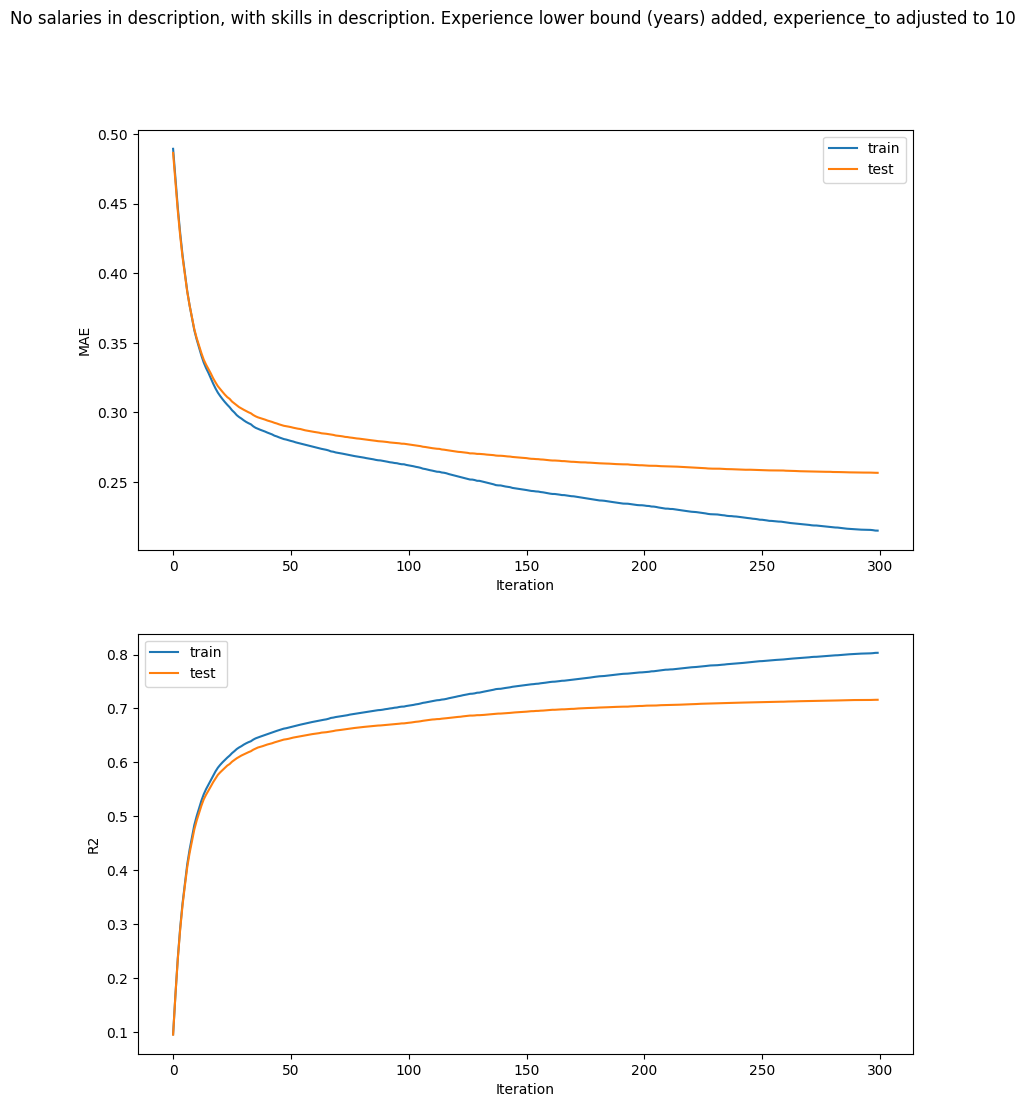

In [85]:
from catboost import CatBoostRegressor, Pool

experiment_name = 'No salaries in description, with skills in description. Experience lower bound (years) added, experience_to adjusted to 10'

text_features = [
'title',
'location',
'company',
'description_no_numbers_with_skills'
]

features = text_features + ['experience_from'] + ['experience_to_adjusted_10']

X = merged_data[features]

y = merged_data['log_salary_from']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_pool = Pool(X_train, y_train, 
                  text_features=text_features
                  )
test_pool = Pool(X_test, y_test, 
                 text_features=text_features
                 )

model = CatBoostRegressor(
    iterations=300,
    depth=10,
    learning_rate=0.1,
    loss_function='RMSE',
    verbose=50,
    eval_metric='R2',
    custom_metric=[
        'MAE',
        'R2',
        ]
    )


fit_predict(model, train_pool, test_pool, experiment_name)

# bestTest = 0.7118350342

try set the border to 9 now

0:	learn: 0.0964290	test: 0.0958440	best: 0.0958440 (0)	total: 1.95s	remaining: 9m 44s
50:	learn: 0.6660334	test: 0.6448206	best: 0.6448206 (50)	total: 1m 31s	remaining: 7m 25s
100:	learn: 0.7049504	test: 0.6738628	best: 0.6738628 (100)	total: 3m	remaining: 5m 55s
150:	learn: 0.7401889	test: 0.6921610	best: 0.6921610 (150)	total: 4m 29s	remaining: 4m 25s
200:	learn: 0.7667883	test: 0.7029330	best: 0.7029330 (200)	total: 6m	remaining: 2m 57s
250:	learn: 0.7869544	test: 0.7100148	best: 0.7100148 (250)	total: 7m 29s	remaining: 1m 27s
299:	learn: 0.8038907	test: 0.7151171	best: 0.7151171 (299)	total: 8m 58s	remaining: 0us

bestTest = 0.7151171437
bestIteration = 299

--------------------------------------------------
R2: 0.7151 at iteration 299
MAE: 0.2569 at iteration 299
--------------------------------------------------


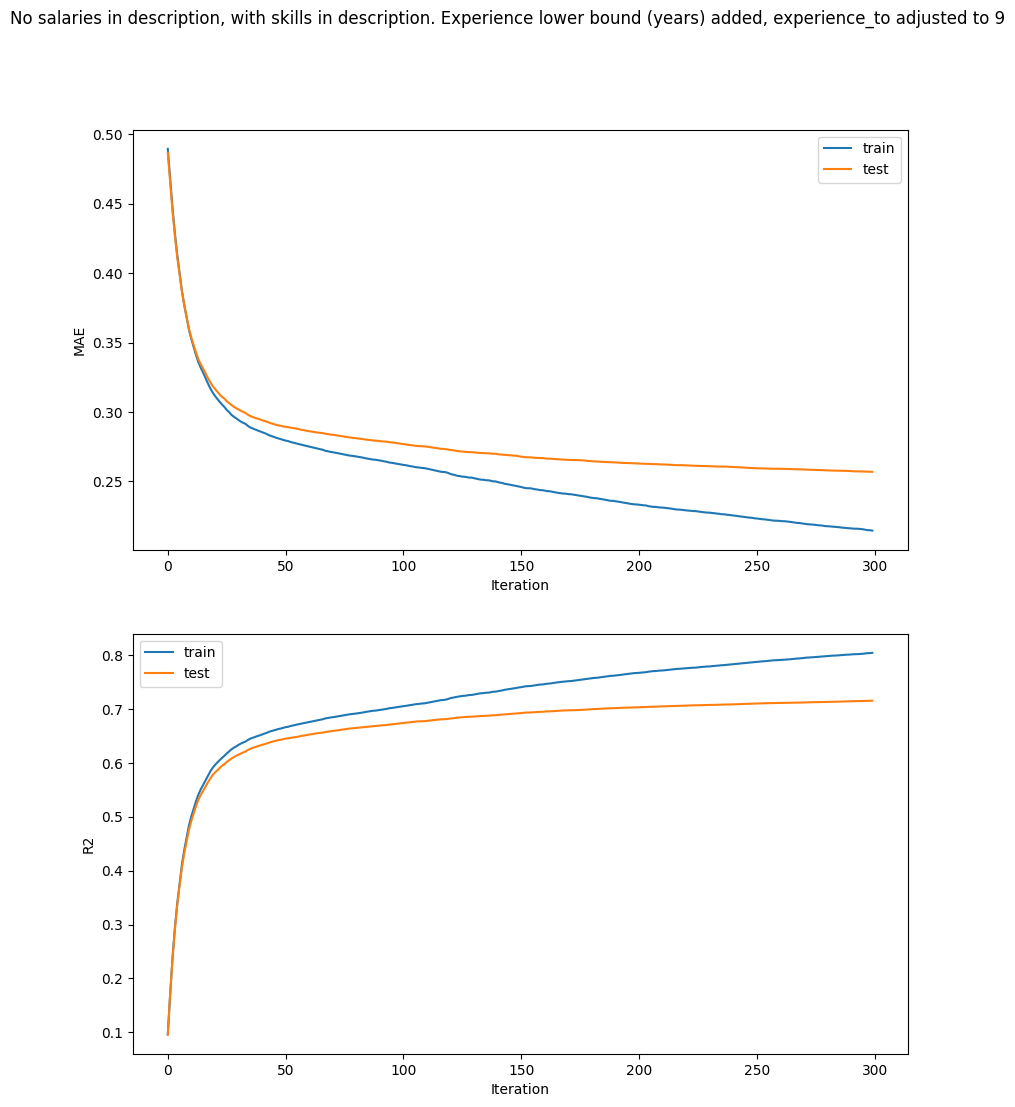

In [86]:
n_years = 9
merged_data[f'experience_to_adjusted_{n_years}'] = merged_data['experience_to'].apply(lambda x: n_years if x == -1 else x)

from catboost import CatBoostRegressor, Pool

experiment_name = f'No salaries in description, with skills in description. Experience lower bound (years) added, experience_to adjusted to {n_years}'

text_features = [
'title',
'location',
'company',
'description_no_numbers_with_skills'
]

features = text_features + ['experience_from'] + [f'experience_to_adjusted_{n_years}']

X = merged_data[features]

y = merged_data['log_salary_from']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_pool = Pool(X_train, y_train, 
                  text_features=text_features
                  )
test_pool = Pool(X_test, y_test, 
                 text_features=text_features
                 )

model = CatBoostRegressor(
    iterations=300,
    depth=10,
    learning_rate=0.1,
    loss_function='RMSE',
    verbose=50,
    eval_metric='R2',
    custom_metric=[
        'MAE',
        'R2',
        ]
    )


fit_predict(model, train_pool, test_pool, experiment_name)

# bestTest = 0.7118350342

In [87]:
# save to csv
merged_data.to_csv('../data/merged_data_getmatch_hh_unique_with_salary_rur_no_bottom_outliers_log_transformed.csv', index=False)

In [88]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22224 entries, 0 to 22223
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   title                               22224 non-null  object 
 1   location                            22224 non-null  object 
 2   company                             22224 non-null  object 
 3   skills                              22224 non-null  object 
 4   grade                               1161 non-null   object 
 5   description                         22224 non-null  object 
 6   salary_from                         22224 non-null  float64
 7   salary_to                           10423 non-null  float64
 8   currency                            22224 non-null  object 
 9   source                              22224 non-null  object 
 10  url                                 22224 non-null  object 
 11  experience_from                     22224

### Text processing

In [1]:
import pandas as pd

merged_data = pd.read_csv('../data/merged_data_getmatch_hh_unique_with_salary_rur_no_bottom_outliers_log_transformed.csv')

#### Tokenization

default tokenization

In [90]:
from catboost.text_processing import Tokenizer

simple_tokenizer = Tokenizer()

def tokenize_texts(texts):
    return [simple_tokenizer.tokenize(text) for text in texts]

# take a small sample of data
text_small = merged_data['description_no_numbers_with_skills'].sample(1, random_state=546456)

tokenized_text = tokenize_texts(text_small)
tokenized_text

[['Ищем',
  'в',
  'команду',
  'крепкого\nстаршего',
  'коммуникационного',
  'дизайнера\nна',
  'B2B-направление.\nЧем',
  'предстоит',
  'заниматься\nСоздавать',
  'идеи',
  'для',
  'креативов,',
  'собирать',
  'кейвижуалы.\nРаботать',
  'с',
  'внешними',
  'и',
  'внутренними',
  'коммуникациями',
  '(в',
  'основном',
  'диджитал,',
  'а',
  'также',
  'офлайн).\nСовместно',
  'с',
  'командой',
  'развивать',
  'визуальный',
  'язык,',
  'придумывать',
  'и',
  'внедрять',
  'новые',
  'визуальные',
  'решения.\nЛидировать',
  'команду',
  'дизайнеров,',
  'а',
  'также',
  'курировать',
  'работу',
  'подрядчиков.\nСоздавать',
  'гайдлайны',
  'и',
  'следить',
  'за',
  'их',
  'соблюдением',
  'и',
  'развитием.\nЧто',
  'нам',
  'важно\nХороший',
  'вкус',
  'и',
  'насмотренность,',
  'высокий',
  'технический',
  'скилл.\nУмение',
  'думать',
  'и',
  'задавать',
  'вопросы.\nОпыт',
  'от',
  '4',
  'лет,',
  'сильные',
  'кейсы',
  'в',
  'портфолио.\nЗнание',
  'пакета

fix splitting, add lowercase and languages

In [91]:
from catboost.text_processing import Tokenizer

simple_tokenizer = Tokenizer(
    lowercasing=True,
    languages=['ru', 'en'],
    # separator_type='BySense',
    separator_type='ByDelimiter',
    split_by_set=True,
    delimiter='\n -.\t\s/,:;()[]{}!#$*|+=?`"\'',
)

def tokenize_texts(texts):
    return [simple_tokenizer.tokenize(text) for text in texts]

# take a small sample of data
text_small = merged_data['description_no_numbers_with_skills'].sample(1, random_state=546456)

tokenized_text = tokenize_texts(text_small)
tokenized_text

[['ищем',
  'в',
  'команду',
  'крепкого',
  'старшего',
  'коммуникационного',
  'дизайнера',
  'на',
  'b2b',
  'направление',
  'чем',
  'предстоит',
  'заниматься',
  'создавать',
  'идеи',
  'для',
  'креативов',
  'собирать',
  'кейвижуалы',
  'работать',
  'с',
  'внешними',
  'и',
  'внутренними',
  'коммуникациями',
  'в',
  'основном',
  'диджитал',
  'а',
  'также',
  'офлайн',
  'совместно',
  'с',
  'командой',
  'развивать',
  'визуальный',
  'язык',
  'придумывать',
  'и',
  'внедрять',
  'новые',
  'визуальные',
  'решения',
  'лидировать',
  'команду',
  'дизайнеров',
  'а',
  'также',
  'курировать',
  'работу',
  'подрядчиков',
  'создавать',
  'гайдлайны',
  'и',
  'следить',
  'за',
  'их',
  'соблюдением',
  'и',
  'развитием',
  'что',
  'нам',
  'важно',
  'хороший',
  'вкус',
  'и',
  'насмотренность',
  'высокий',
  'технический',
  'скилл',
  'умение',
  'думать',
  'и',
  'задавать',
  'вопросы',
  'опыт',
  'от',
  '4',
  'лет',
  'сильные',
  'кейсы',
  '

numbers to a special token

In [2]:
from catboost.text_processing import Tokenizer

simple_tokenizer = Tokenizer(
    lowercasing=True,
    languages=['ru', 'en'],
    number_process_policy='Replace',
    number_token='[NUMBER]',
    # separator_type='BySense',
    separator_type='ByDelimiter',
    split_by_set=True,
    delimiter='\n -.\t\s/,:;()[]{}!#$*|+=?`"\'',
)

def tokenize_texts(texts):
    return [simple_tokenizer.tokenize(text) for text in texts]

# take a small sample of data
text_small = merged_data['description_no_numbers_with_skills'].sample(1, random_state=546456)

tokenized_text = tokenize_texts(text_small)
tokenized_text

[['ищем',
  'в',
  'команду',
  'крепкого',
  'старшего',
  'коммуникационного',
  'дизайнера',
  'на',
  'b2b',
  'направление',
  'чем',
  'предстоит',
  'заниматься',
  'создавать',
  'идеи',
  'для',
  'креативов',
  'собирать',
  'кейвижуалы',
  'работать',
  'с',
  'внешними',
  'и',
  'внутренними',
  'коммуникациями',
  'в',
  'основном',
  'диджитал',
  'а',
  'также',
  'офлайн',
  'совместно',
  'с',
  'командой',
  'развивать',
  'визуальный',
  'язык',
  'придумывать',
  'и',
  'внедрять',
  'новые',
  'визуальные',
  'решения',
  'лидировать',
  'команду',
  'дизайнеров',
  'а',
  'также',
  'курировать',
  'работу',
  'подрядчиков',
  'создавать',
  'гайдлайны',
  'и',
  'следить',
  'за',
  'их',
  'соблюдением',
  'и',
  'развитием',
  'что',
  'нам',
  'важно',
  'хороший',
  'вкус',
  'и',
  'насмотренность',
  'высокий',
  'технический',
  'скилл',
  'умение',
  'думать',
  'и',
  'задавать',
  'вопросы',
  'опыт',
  'от',
  '[NUMBER]',
  'лет',
  'сильные',
  'кейс

See the text len distribution for the whole dataset

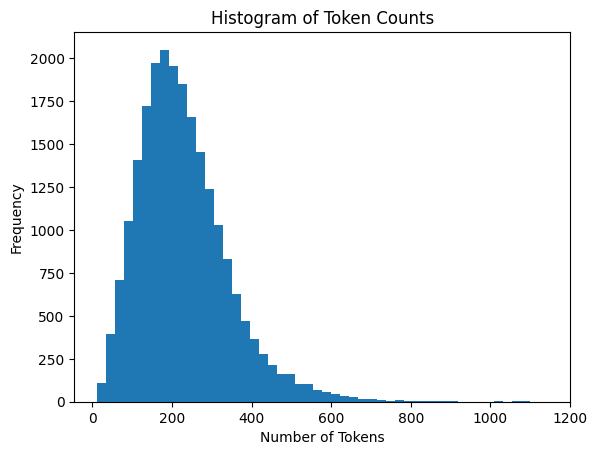

In [3]:
from matplotlib import pyplot as plt


texts = merged_data['description_no_numbers_with_skills']

tokenized_text = tokenize_texts(texts)

# plot histogram of token counts
token_counts = [len(tokens) for tokens in tokenized_text]
plt.hist(token_counts, bins=50)
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.title('Histogram of Token Counts')
plt.show()


##### Get dictionary size

In [93]:
# check dict size (set of unique tokens) for all texts
# and see how many tokens are in the dictionary
# then, plot frequency of tokens (i.e., token rank vs token frequency)
from catboost.text_processing import Tokenizer

simple_tokenizer = Tokenizer(
    lowercasing=True,
    languages=['ru', 'en'],
    number_process_policy='Replace',
    number_token='[NUMBER]',
    # separator_type='BySense',
    separator_type='ByDelimiter',
    split_by_set=True,
    delimiter='\n -.\t\s/,:;()[]{}!#$*|+=?`"\'',
)

def tokenize_texts(texts):
    return [simple_tokenizer.tokenize(text) for text in texts]

# take a small sample of data
texts = merged_data['description_no_numbers_with_skills']

tokenized_text = tokenize_texts(texts)
print(f"Dict size: {len(set([token for tokens in tokenized_text for token in tokens]))}")

Dict size: 101395


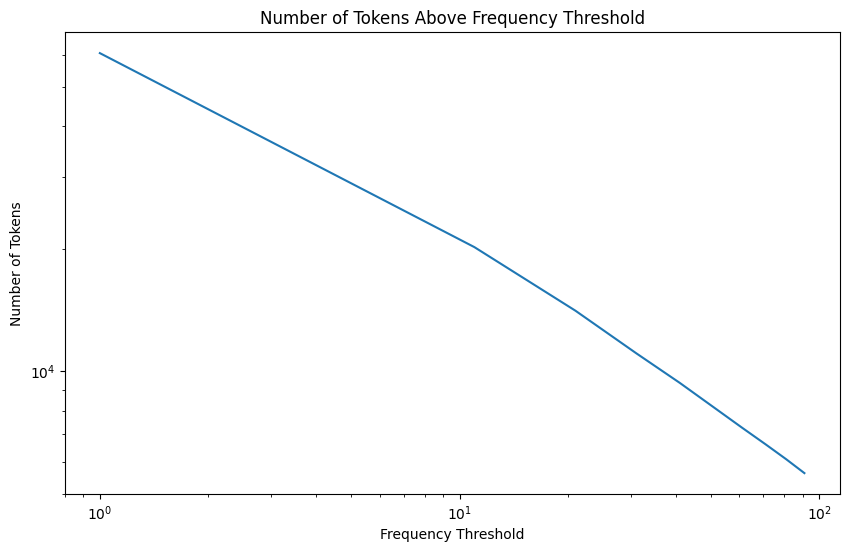

In [94]:
# get frequency of tokens
from collections import Counter
import numpy as np

token_counter = Counter()
for tokens in tokenized_text:
    token_counter.update(tokens)

# get token frequency
token_frequency = list(token_counter.values())
token_frequency.sort(reverse=True)

# # plot token frequency
# plt.figure(figsize=(10, 6))
# start_rank = 5000
# end_rank = 30000

# x = range(start_rank, end_rank)
# plt.plot(x, token_frequency[start_rank:end_rank])
# # plt.plot(token_frequency[10000:60000])
# plt.title('Token Frequency')
# plt.xlabel('Token Rank')
# plt.ylabel('Token Frequency')
# plt.show()

# create a lineplot, where x is threshold, and y is number of tokens above threshold
token_frequency = np.array(token_frequency)
count_thresholds = [
    # 1, 2, 3, 4, 5, 10, 20, 50,
    # 100, 200, 500, 1000, 2000,
    # 5000, 10000, 20000, 50000, 100000
    ]
count_thresholds = list(range(1, 100, 10))
n_tokens_above_threshold = [np.sum(token_frequency > threshold) for threshold in count_thresholds]
plt.figure(figsize=(10, 6))

plt.plot(count_thresholds, n_tokens_above_threshold)
plt.title('Number of Tokens Above Frequency Threshold')
plt.xlabel('Frequency Threshold')
plt.ylabel('Number of Tokens')
plt.yscale('log')
plt.xscale('log')


plt.show()




0:	learn: 0.0941733	test: 0.0934782	best: 0.0934782 (0)	total: 1.94s	remaining: 9m 40s
50:	learn: 0.6827472	test: 0.6601723	best: 0.6601723 (50)	total: 1m 47s	remaining: 8m 46s
100:	learn: 0.7237675	test: 0.6889479	best: 0.6889479 (100)	total: 2m 59s	remaining: 5m 54s
150:	learn: 0.7588143	test: 0.7069245	best: 0.7069245 (150)	total: 4m 10s	remaining: 4m 6s
200:	learn: 0.7836297	test: 0.7170341	best: 0.7170341 (200)	total: 5m 21s	remaining: 2m 38s
250:	learn: 0.8044022	test: 0.7227655	best: 0.7227655 (250)	total: 6m 51s	remaining: 1m 20s
299:	learn: 0.8191455	test: 0.7276091	best: 0.7276091 (299)	total: 8m 27s	remaining: 0us

bestTest = 0.727609143
bestIteration = 299

--------------------------------------------------
R2: 0.7276 at iteration 299
MAE: 0.2516 at iteration 299
--------------------------------------------------


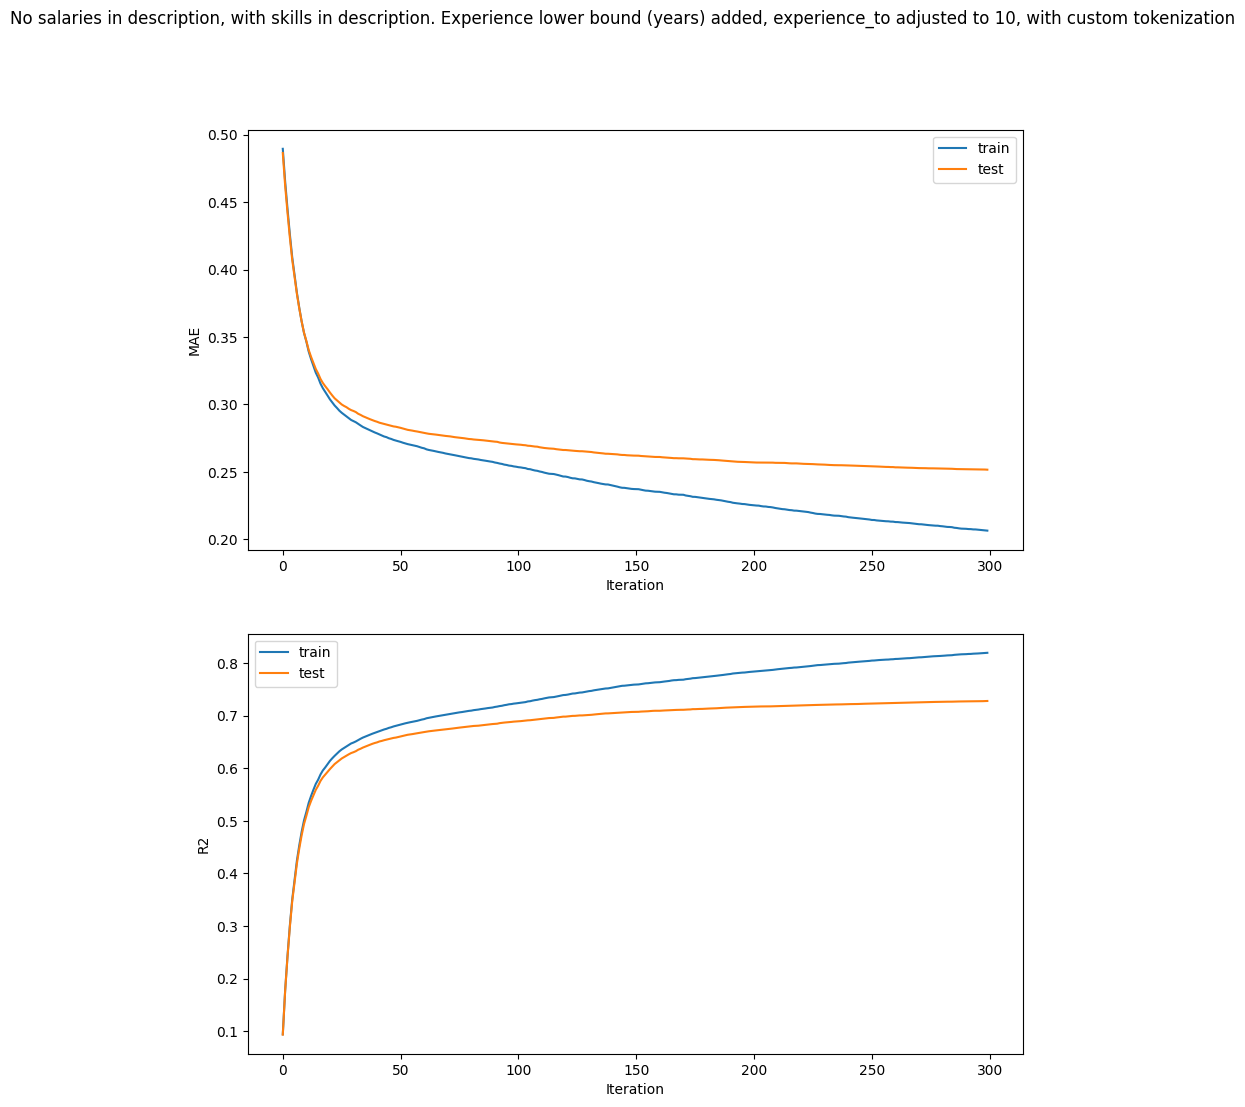

In [97]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

experiment_name = 'No salaries in description, with skills in description. Experience lower bound (years) added, experience_to adjusted to 10, with custom tokenization'

text_features = [
'title',
'location',
'company',
'description_no_numbers_with_skills'
]

features = text_features + ['experience_from'] + ['experience_to_adjusted_10']

X = merged_data[features]

y = merged_data['log_salary_from']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_pool = Pool(X_train, y_train, 
                  text_features=text_features
                  )
test_pool = Pool(X_test, y_test, 
                 text_features=text_features
                 )

model = CatBoostRegressor(
    iterations=300,
    depth=10,
    learning_rate=0.1,
    loss_function='RMSE',
    verbose=50,
    eval_metric='R2',
    early_stopping_rounds=10,
    custom_metric=[
        'MAE',
        'R2',
        ],
    tokenizers=[{
            "tokenizer_id" : "Space",
            "separator_type" : "ByDelimiter",
            "split_by_set" : "True",
            "delimiter" : '\n -.\t\s/,:;()[]{}!#$*|+=?`"\'_',
            "languages": ['ru', 'en'],
            "number_process_policy":'Replace',
            "number_token":'[NUMBER]',
        }],
    )


fit_predict(model, train_pool, test_pool, experiment_name)
# bestTest = 0.7118350342

#### Stop words removal

In [98]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words('russian')

In [99]:
from catboost.text_processing import Tokenizer

simple_tokenizer = Tokenizer(
    lowercasing=True,
    languages=['ru', 'en'],
    number_process_policy='Replace',
    number_token='[NUMBER]',
    # separator_type='BySense',
    separator_type='ByDelimiter',
    split_by_set=True,
    delimiter='\n -.\t\s/,:;()[]{}!#$*|+=?`"\'',
)

def remove_stopwords(text):
    words = simple_tokenizer.tokenize(text)
    return ' '.join([word for word in words if word not in russian_stopwords])

merged_data['description_no_numbers_with_skills_no_stopwords'] = merged_data['description_no_numbers_with_skills'].apply(remove_stopwords)

0:	learn: 0.0985988	test: 0.0983222	best: 0.0983222 (0)	total: 1.89s	remaining: 9m 25s
50:	learn: 0.6858894	test: 0.6639155	best: 0.6639155 (50)	total: 1m 36s	remaining: 7m 51s
100:	learn: 0.7236155	test: 0.6913824	best: 0.6913824 (100)	total: 3m 10s	remaining: 6m 16s
150:	learn: 0.7577814	test: 0.7086406	best: 0.7086406 (150)	total: 4m 26s	remaining: 4m 23s
200:	learn: 0.7845393	test: 0.7166082	best: 0.7166082 (200)	total: 5m 40s	remaining: 2m 47s
250:	learn: 0.8037912	test: 0.7234686	best: 0.7234686 (250)	total: 6m 52s	remaining: 1m 20s
299:	learn: 0.8187672	test: 0.7274568	best: 0.7274568 (299)	total: 8m 2s	remaining: 0us

bestTest = 0.7274567739
bestIteration = 299

--------------------------------------------------
R2: 0.7275 at iteration 299
MAE: 0.2511 at iteration 299
--------------------------------------------------


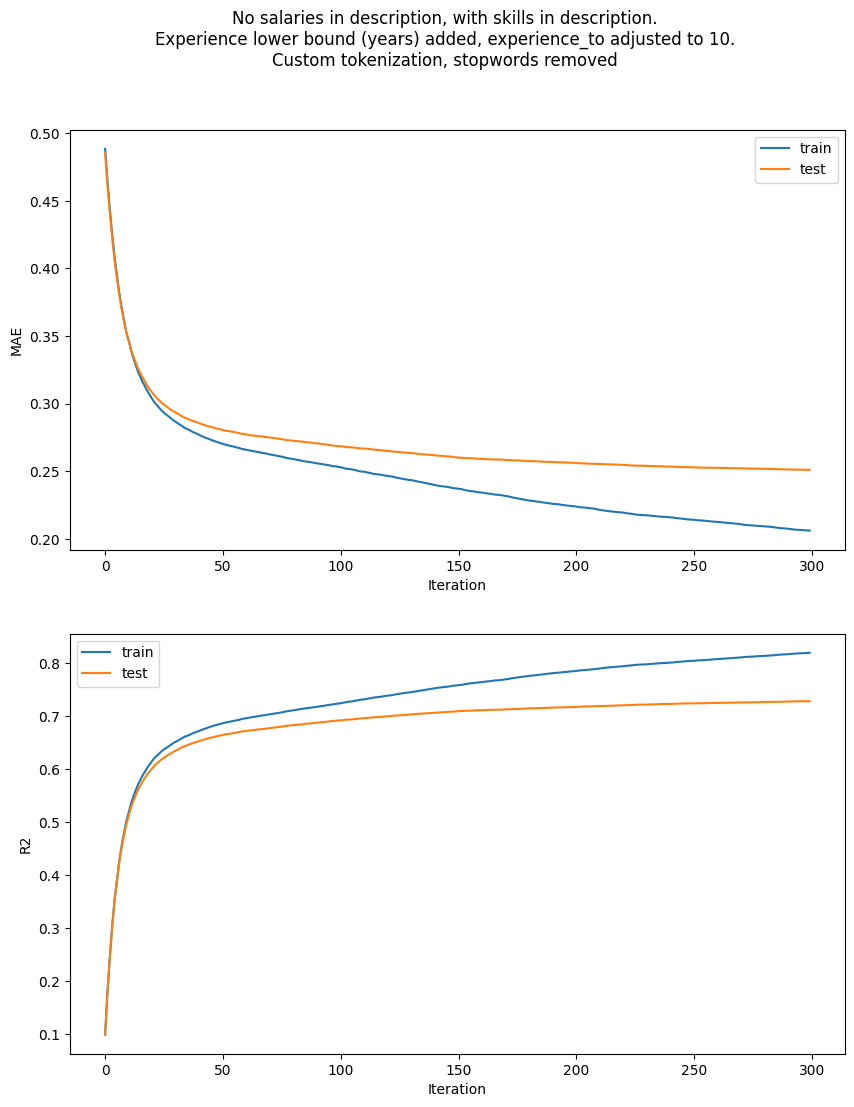

In [100]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

experiment_name = """No salaries in description, with skills in description.
Experience lower bound (years) added, experience_to adjusted to 10.
Custom tokenization, stopwords removed"""

text_features = [
'title',
'location',
'company',
'description_no_numbers_with_skills_no_stopwords'
]

features = text_features + ['experience_from'] + ['experience_to_adjusted_10']

X = merged_data[features]

y = merged_data['log_salary_from']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_pool = Pool(X_train, y_train, 
                  text_features=text_features
                  )
test_pool = Pool(X_test, y_test, 
                 text_features=text_features
                 )

model = CatBoostRegressor(
    iterations=300,
    depth=10,
    learning_rate=0.1,
    loss_function='RMSE',
    verbose=50,
    eval_metric='R2',
    early_stopping_rounds=10,
    custom_metric=[
        'MAE',
        'R2',
        ],
    tokenizers=[{
            "tokenizer_id" : "Space",
            "separator_type" : "ByDelimiter",
            "split_by_set" : "True",
            "delimiter" : '\n -.\t\s/,:;()[]{}!#$*|+=?`"\'_',
            "languages": ['ru', 'en'],
            "number_process_policy":'Replace',
            "number_token":'[NUMBER]',
        }],
    )

fit_predict(model, train_pool, test_pool, experiment_name)

# bestTest = 0.7118350342

#### Dictionaries

check that the dictionaries are indeed default ones,ie the result with dicts specificed is the same as with dicts=None

0:	learn: 0.0941733	test: 0.0934782	best: 0.0934782 (0)	total: 1.23s	remaining: 6m 9s
50:	learn: 0.6827472	test: 0.6601723	best: 0.6601723 (50)	total: 1m 29s	remaining: 7m 14s
100:	learn: 0.7237675	test: 0.6889479	best: 0.6889479 (100)	total: 2m 39s	remaining: 5m 14s
150:	learn: 0.7588143	test: 0.7069245	best: 0.7069245 (150)	total: 3m 50s	remaining: 3m 47s
200:	learn: 0.7836297	test: 0.7170341	best: 0.7170341 (200)	total: 5m	remaining: 2m 27s
250:	learn: 0.8044022	test: 0.7227655	best: 0.7227655 (250)	total: 6m 8s	remaining: 1m 11s
299:	learn: 0.8191455	test: 0.7276091	best: 0.7276091 (299)	total: 7m 16s	remaining: 0us

bestTest = 0.727609143
bestIteration = 299

--------------------------------------------------
R2: 0.7276 at iteration 299
MAE: 0.2516 at iteration 299
--------------------------------------------------


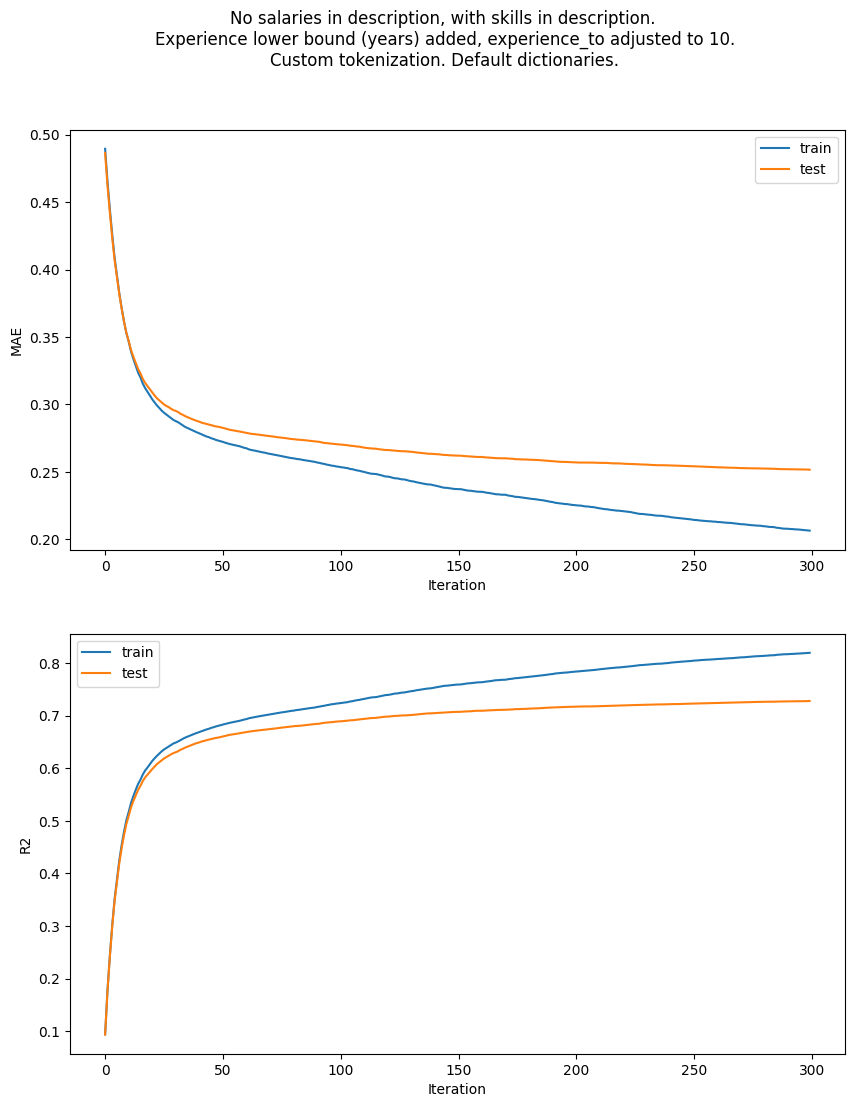

In [101]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

experiment_name = """No salaries in description, with skills in description. 
Experience lower bound (years) added, experience_to adjusted to 10.
Custom tokenization. Default dictionaries."""

text_features = [
'title',
'location',
'company',
'description_no_numbers_with_skills'
]

features = text_features + ['experience_from'] + ['experience_to_adjusted_10']

X = merged_data[features]

y = merged_data['log_salary_from']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_pool = Pool(X_train, y_train, 
                  text_features=text_features
                  )
test_pool = Pool(X_test, y_test, 
                 text_features=text_features
                 )

model = CatBoostRegressor(
    iterations=300,
    depth=10,
    learning_rate=0.1,
    loss_function='RMSE',
    verbose=50,
    eval_metric='R2',
    early_stopping_rounds=10,
    custom_metric=[
        'MAE',
        'R2',
        ],
    tokenizers=[{
            "tokenizer_id" : "Space",
            "separator_type" : "ByDelimiter",
            "split_by_set" : "True",
            "delimiter" : '\n -.\t\s/,:;()[]{}!#$*|+=?`"\'_',
            "languages": ['ru', 'en'],
            "number_process_policy":'Replace',
            "number_token":'[NUMBER]',
        }],
    dictionaries = [{
        "dictionary_id" : "BiGram",
        "max_dictionary_size" : "50000",
        "occurrence_lower_bound" : "3",
        "gram_order" : "2"
    }, {
        "dictionary_id" : "Word",
        "max_dictionary_size" : "50000",
        "occurrence_lower_bound" : "3",
        "gram_order" : "1"
    }],
    # feature_calcers=None
    )

fit_predict(model, train_pool, test_pool, experiment_name)

# bestTest = 0.727609143

So, same performance as when `dict=None`

now reduce dict sizes by increasing lower bound limit. also, increase overfitting penalty

0:	learn: 0.0976994	test: 0.0969216	best: 0.0969216 (0)	total: 530ms	remaining: 2m 38s
50:	learn: 0.6754819	test: 0.6574932	best: 0.6574932 (50)	total: 27.5s	remaining: 2m 14s
100:	learn: 0.7158307	test: 0.6882649	best: 0.6882649 (100)	total: 53.4s	remaining: 1m 45s
150:	learn: 0.7501048	test: 0.7072496	best: 0.7072496 (150)	total: 1m 19s	remaining: 1m 18s
200:	learn: 0.7746643	test: 0.7166341	best: 0.7166341 (200)	total: 1m 45s	remaining: 51.8s
250:	learn: 0.7946521	test: 0.7235911	best: 0.7235911 (250)	total: 2m 11s	remaining: 25.7s
299:	learn: 0.8116983	test: 0.7283878	best: 0.7283878 (299)	total: 2m 37s	remaining: 0us

bestTest = 0.7283878031
bestIteration = 299

--------------------------------------------------
R2: 0.7284 at iteration 299
MAE: 0.2524 at iteration 299
--------------------------------------------------


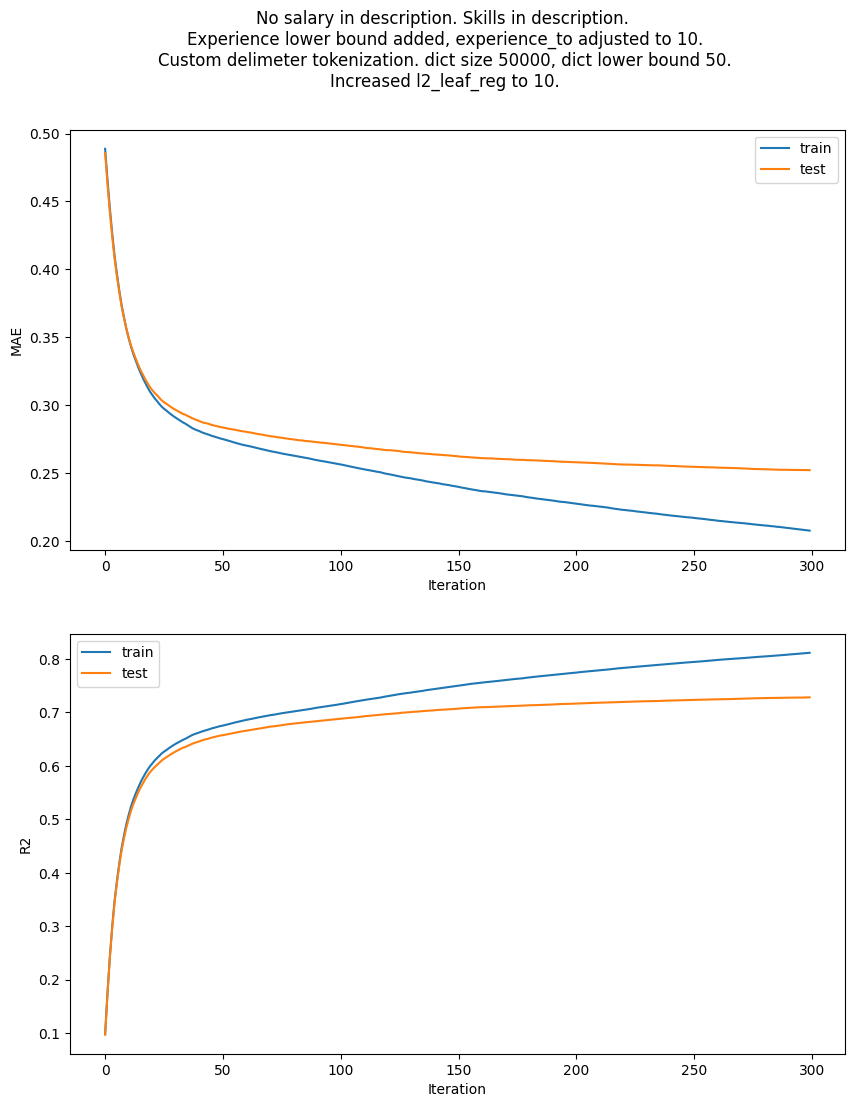

In [102]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

dict_size = 50_000
dict_lower_bound = 50
experiment_name = f"""No salary in description. Skills in description. 
Experience lower bound added, experience_to adjusted to 10.
Custom delimeter tokenization. dict size {dict_size}, dict lower bound {dict_lower_bound}.
Increased l2_leaf_reg to 10."""

text_features = [
'title',
'location',
'company',
'description_no_numbers_with_skills'
]

features = text_features + ['experience_from'] + ['experience_to_adjusted_10']

X = merged_data[features]

y = merged_data['log_salary_from']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_pool = Pool(X_train, y_train, 
                  text_features=text_features
                  )
test_pool = Pool(X_test, y_test, 
                 text_features=text_features
                 )

model = CatBoostRegressor(
    iterations=300,
    depth=10,
    learning_rate=0.1,
    loss_function='RMSE',
    verbose=50,
    eval_metric='R2',
    early_stopping_rounds=10,
    l2_leaf_reg=10,
    custom_metric=[
        'MAE',
        'R2',
        ],
    tokenizers=[{
            "tokenizer_id" : "Space",
            "separator_type" : "ByDelimiter",
            "split_by_set" : "True",
            "delimiter" : '\n -.\t\s/,:;()[]{}!#$*|+=?`"\'_',
            "languages": ['ru', 'en'],
            "number_process_policy":'Replace',
            "number_token":'[NUMBER]',
        }],
    dictionaries = [{
        "dictionary_id" : "BiGram",
        "max_dictionary_size" : f"{dict_size}", # dict size
        "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
        "gram_order" : "2"
    }, {
        "dictionary_id" : "Word",
        "max_dictionary_size" : f"{dict_size}", # dict size
        "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
        "gram_order" : "1"
    }],
    # feature_calcers=None
    )

fit_predict(model, train_pool, test_pool, experiment_name)

# for size 1000:
# 200:	learn: 0.7872633	test: 0.7164939	best: 0.7164939 (200)	total: 2m 57s	remaining: 1m 27s

0:	learn: 0.0923021	test: 0.0924854	best: 0.0924854 (0)	total: 535ms	remaining: 2m 40s
50:	learn: 0.6770096	test: 0.6577633	best: 0.6577633 (50)	total: 29.8s	remaining: 2m 25s
100:	learn: 0.7168221	test: 0.6880366	best: 0.6880366 (100)	total: 58.6s	remaining: 1m 55s
150:	learn: 0.7502573	test: 0.7074195	best: 0.7074195 (150)	total: 1m 27s	remaining: 1m 25s
200:	learn: 0.7747453	test: 0.7175246	best: 0.7175246 (200)	total: 1m 56s	remaining: 57.2s
250:	learn: 0.7939076	test: 0.7241104	best: 0.7241104 (250)	total: 2m 25s	remaining: 28.3s
299:	learn: 0.8102337	test: 0.7289860	best: 0.7289860 (299)	total: 2m 53s	remaining: 0us

bestTest = 0.7289859875
bestIteration = 299

--------------------------------------------------
R2: 0.7290 at iteration 299
MAE: 0.2510 at iteration 299
--------------------------------------------------


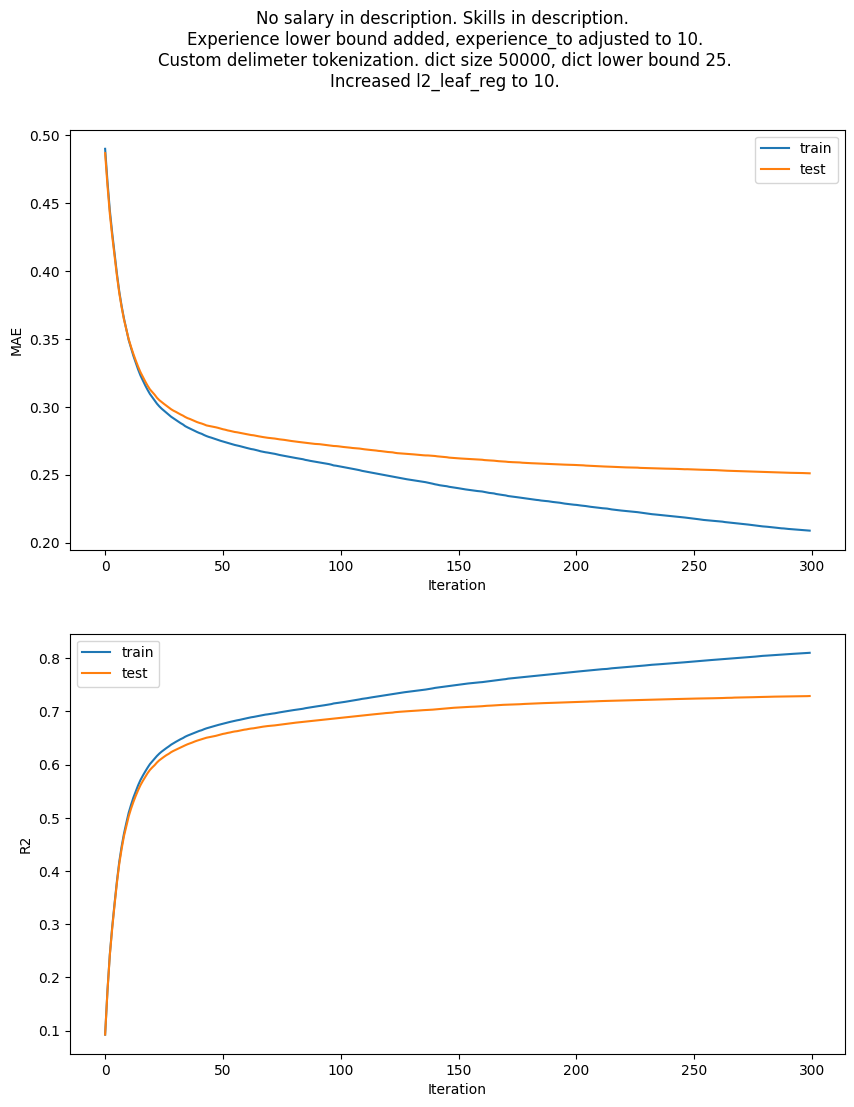

In [103]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

dict_size = 50_000
dict_lower_bound = 25
experiment_name = f"""No salary in description. Skills in description. 
Experience lower bound added, experience_to adjusted to 10.
Custom delimeter tokenization. dict size {dict_size}, dict lower bound {dict_lower_bound}.
Increased l2_leaf_reg to 10."""

text_features = [
'title',
'location',
'company',
'description_no_numbers_with_skills'
]

features = text_features + ['experience_from'] + ['experience_to_adjusted_10']

X = merged_data[features]

y = merged_data['log_salary_from']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_pool = Pool(X_train, y_train, 
                  text_features=text_features
                  )
test_pool = Pool(X_test, y_test, 
                 text_features=text_features
                 )

model = CatBoostRegressor(
    iterations=300,
    depth=10,
    learning_rate=0.1,
    loss_function='RMSE',
    verbose=50,
    eval_metric='R2',
    early_stopping_rounds=10,
    l2_leaf_reg=10,
    custom_metric=[
        'MAE',
        'R2',
        ],
    tokenizers=[{
            "tokenizer_id" : "Space",
            "separator_type" : "ByDelimiter",
            "split_by_set" : "True",
            "delimiter" : '\n -.\t\s/,:;()[]{}!#$*|+=?`"\'_',
            "languages": ['ru', 'en'],
            "number_process_policy":'Replace',
            "number_token":'[NUMBER]',
        }],
    dictionaries = [{
        "dictionary_id" : "BiGram",
        "max_dictionary_size" : f"{dict_size}", # dict size
        "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
        "gram_order" : "2"
    }, {
        "dictionary_id" : "Word",
        "max_dictionary_size" : f"{dict_size}", # dict size
        "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
        "gram_order" : "1"
    }],
    # feature_calcers=None
    )

fit_predict(model, train_pool, test_pool, experiment_name)

# for size 1000:
# 200:	learn: 0.7872633	test: 0.7164939	best: 0.7164939 (200)	total: 2m 57s	remaining: 1m 27s

#### Drop jobs with non-relevant titles

In [104]:
from nltk.corpus import stopwords
russian_stopwords = stopwords.words('russian')

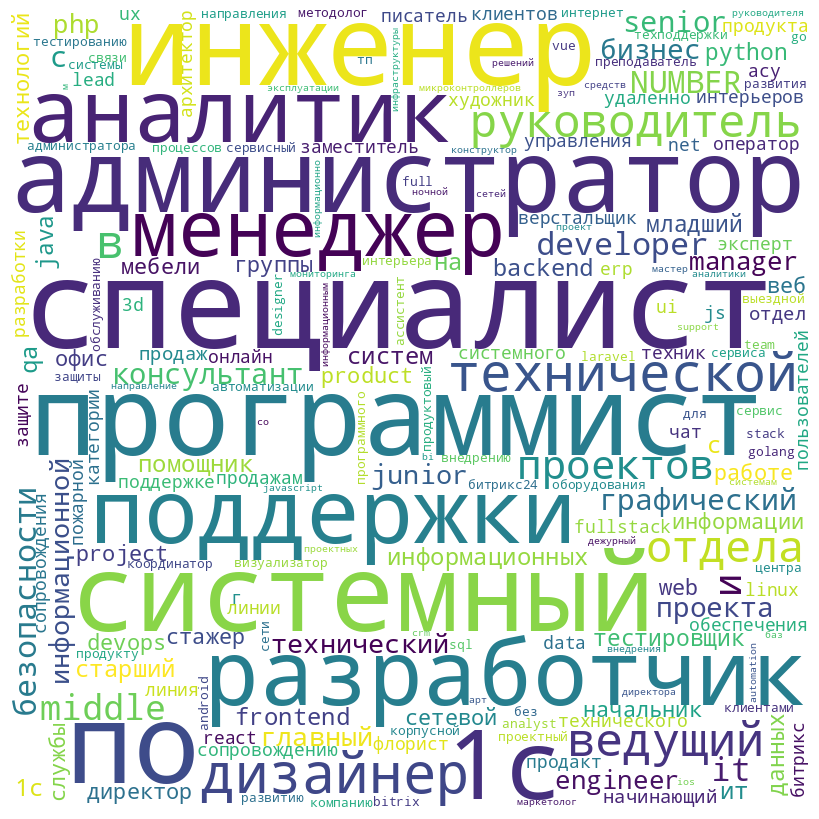

In [105]:
# count single words in titles, build wordcloud
from wordcloud import WordCloud
from catboost.text_processing import Tokenizer
from matplotlib import pyplot as plt

simple_tokenizer = Tokenizer(
    lowercasing=True,
    languages=['ru', 'en'],
    number_process_policy='Replace',
    number_token='NUMBER',
    separator_type='ByDelimiter',
    split_by_set=True,
    delimiter='\n -.\t /,:;()[]{}!#$*|+=?`"\'',
)

def tokenize_texts(texts):
    return [simple_tokenizer.tokenize(text) for text in texts]

titles = merged_data['title'].dropna()
titles = tokenize_texts(titles)
titles = [item for sublist in titles for item in sublist]

# count words in titles
from collections import Counter
word_counts = Counter(titles)

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords=russian_stopwords,
                min_font_size = 10,
                ).generate_from_frequencies(word_counts)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [117]:
titles = merged_data['title'].dropna()
# for word in [r"менеджер.*продаж", "менеджер по продаж", "продавец", "флорист", "цвет"]:
for word in [
    r"менеджер.*продаж", 
             "продавец", "флорист", "цвет"]:
    print(f"{word}: {titles.str.contains(word, case=False, regex=True).sum()}")

менеджер.*продаж: 232
продавец: 39
флорист: 124
цвет: 11


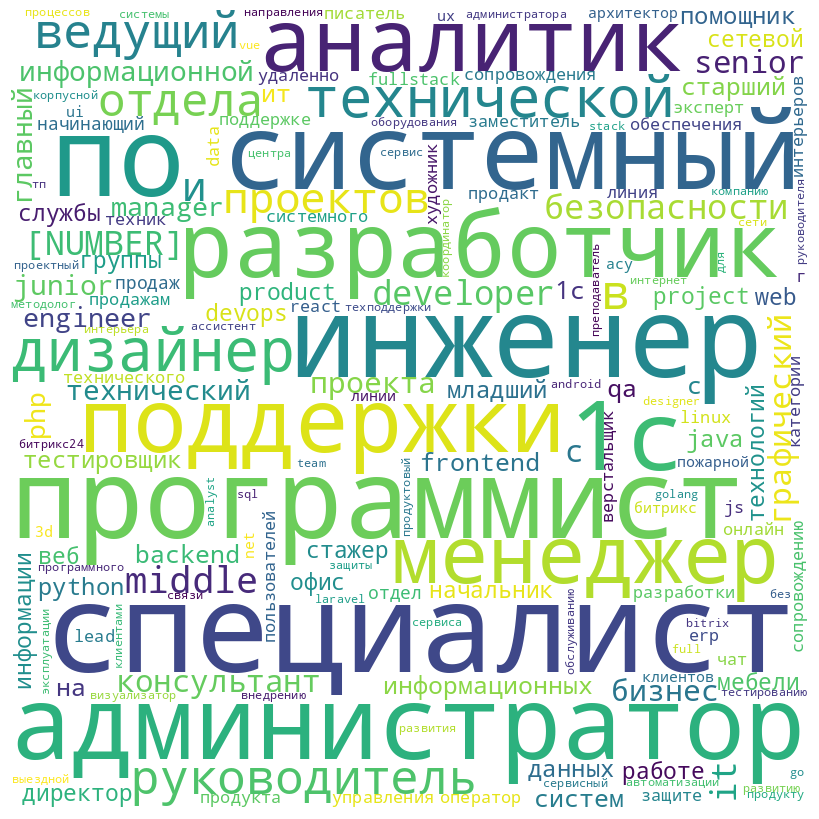

In [118]:
# count single words in titles, build wordcloud
from wordcloud import WordCloud
from catboost.text_processing import Tokenizer

title_stopwords = [
    # r'менеджер.*продаж',
    # "продавец",
    "флорист", "цвет"]

# get titles without stopwords
titles = merged_data['title'].dropna()
for word in title_stopwords:
    titles = titles[~titles.str.contains(word, case=False, regex=True)]

simple_tokenizer = Tokenizer(
    lowercasing=True,
    languages=['ru', 'en'],
    number_process_policy='Replace',
    number_token='[NUMBER]',
    # separator_type='BySense',
    separator_type='ByDelimiter',
    split_by_set=True,
    delimiter='\n -.\t /,:;()[]{}!#$*|+=?`"\'',
)

def tokenize_texts(texts):
    return [simple_tokenizer.tokenize(text) for text in texts]

titles = tokenize_texts(titles)
titles = [item for sublist in titles for item in sublist]

# count words in titles
from collections import Counter
word_counts = Counter(titles)


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords=russian_stopwords,
                min_font_size = 10,
                ).generate_from_frequencies(word_counts)


plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [119]:
# drop rows where title contains a word from title_stopwords
merged_data_cleaned = merged_data.copy(deep=True)

for word in title_stopwords:
    merged_data_cleaned = merged_data_cleaned[~merged_data_cleaned['title'].str.contains(word, case=False, regex=True)]
    
merged_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22094 entries, 0 to 22223
Data columns (total 21 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   title                                            22094 non-null  object 
 1   location                                         22094 non-null  object 
 2   company                                          22094 non-null  object 
 3   skills                                           14318 non-null  object 
 4   grade                                            1161 non-null   object 
 5   description                                      22094 non-null  object 
 6   salary_from                                      22094 non-null  float64
 7   salary_to                                        10355 non-null  float64
 8   currency                                         22094 non-null  object 
 9   source                           

In [120]:
# save to csv
merged_data_cleaned.to_csv('../data/merged_data_getmatch_hh_unique_with_salary_rur_no_title_stopwords.csv', index=False)

0:	learn: 0.0916586	test: 0.0881198	best: 0.0881198 (0)	total: 684ms	remaining: 3m 24s
50:	learn: 0.6762911	test: 0.6543466	best: 0.6543466 (50)	total: 41.8s	remaining: 3m 24s
100:	learn: 0.7177021	test: 0.6855501	best: 0.6855501 (100)	total: 1m 25s	remaining: 2m 49s
150:	learn: 0.7505087	test: 0.7043166	best: 0.7043166 (150)	total: 2m 10s	remaining: 2m 8s
200:	learn: 0.7743181	test: 0.7144363	best: 0.7144363 (200)	total: 2m 59s	remaining: 1m 28s
250:	learn: 0.7940575	test: 0.7208576	best: 0.7208576 (250)	total: 3m 45s	remaining: 43.9s
299:	learn: 0.8103779	test: 0.7259933	best: 0.7259933 (299)	total: 4m 24s	remaining: 0us

bestTest = 0.7259933014
bestIteration = 299

--------------------------------------------------
R2: 0.7260 at iteration 299
MAE: 0.2559 at iteration 299
--------------------------------------------------


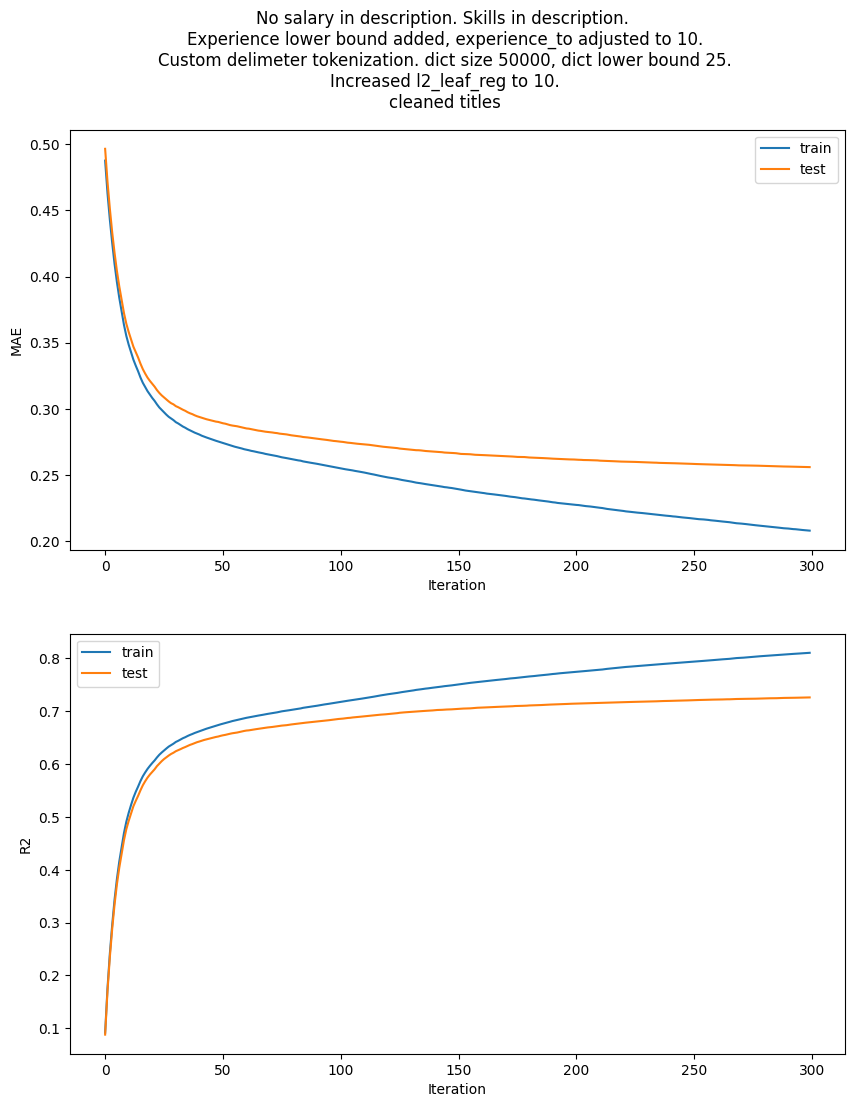

In [121]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

dict_size = 50_000
dict_lower_bound = 25
experiment_name = f"""No salary in description. Skills in description. 
Experience lower bound added, experience_to adjusted to 10.
Custom delimeter tokenization. dict size {dict_size}, dict lower bound {dict_lower_bound}.
Increased l2_leaf_reg to 10.
cleaned titles"""

text_features = [
'title',
'location',
'company',
'description_no_numbers_with_skills'
]

features = text_features + ['experience_from'] + ['experience_to_adjusted_10']

# X = merged_data[features]
X = merged_data_cleaned[features]

# y = merged_data['log_salary_from']
y = merged_data_cleaned['log_salary_from']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_pool = Pool(X_train, y_train, 
                  text_features=text_features
                  )
test_pool = Pool(X_test, y_test, 
                 text_features=text_features
                 )

model = CatBoostRegressor(
    iterations=300,
    depth=10,
    learning_rate=0.1,
    loss_function='RMSE',
    verbose=50,
    eval_metric='R2',
    early_stopping_rounds=10,
    l2_leaf_reg=10,
    custom_metric=[
        'MAE',
        'R2',
        ],
    tokenizers=[{
            "tokenizer_id" : "Space",
            "separator_type" : "ByDelimiter",
            "split_by_set" : "True",
            "delimiter" : '\n -.\t\s/,:;()[]{}!#$*|+=?`"\'_',
            "languages": ['ru', 'en'],
            "number_process_policy":'Replace',
            "number_token":'[NUMBER]',
        }],
    dictionaries = [{
        "dictionary_id" : "BiGram",
        "max_dictionary_size" : f"{dict_size}", # dict size
        "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
        "gram_order" : "2"
    }, {
        "dictionary_id" : "Word",
        "max_dictionary_size" : f"{dict_size}", # dict size
        "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
        "gram_order" : "1"
    }],
    # feature_calcers=None
    )

fit_predict(model, train_pool, test_pool, experiment_name)

# for size 1000:
# 200:	learn: 0.7872633	test: 0.7164939	best: 0.7164939 (200)	total: 2m 57s	remaining: 1m 27s

very weak increase in quality, if any. now to feature extractors

#### Feature calculators

0:	learn: 0.0976164	test: 0.0976624	best: 0.0976624 (0)	total: 391ms	remaining: 1m 56s
50:	learn: 0.6763238	test: 0.6563813	best: 0.6563813 (50)	total: 23.6s	remaining: 1m 55s
100:	learn: 0.7167234	test: 0.6886535	best: 0.6886535 (100)	total: 47.3s	remaining: 1m 33s
150:	learn: 0.7494966	test: 0.7073261	best: 0.7073261 (150)	total: 1m 9s	remaining: 1m 8s
200:	learn: 0.7736514	test: 0.7180594	best: 0.7180594 (200)	total: 1m 33s	remaining: 46.2s
250:	learn: 0.7942542	test: 0.7245442	best: 0.7245442 (250)	total: 1m 56s	remaining: 22.8s
299:	learn: 0.8105834	test: 0.7289079	best: 0.7289079 (299)	total: 2m 19s	remaining: 0us

bestTest = 0.7289078997
bestIteration = 299

--------------------------------------------------
R2: 0.7289 at iteration 299
MAE: 0.2525 at iteration 299
--------------------------------------------------


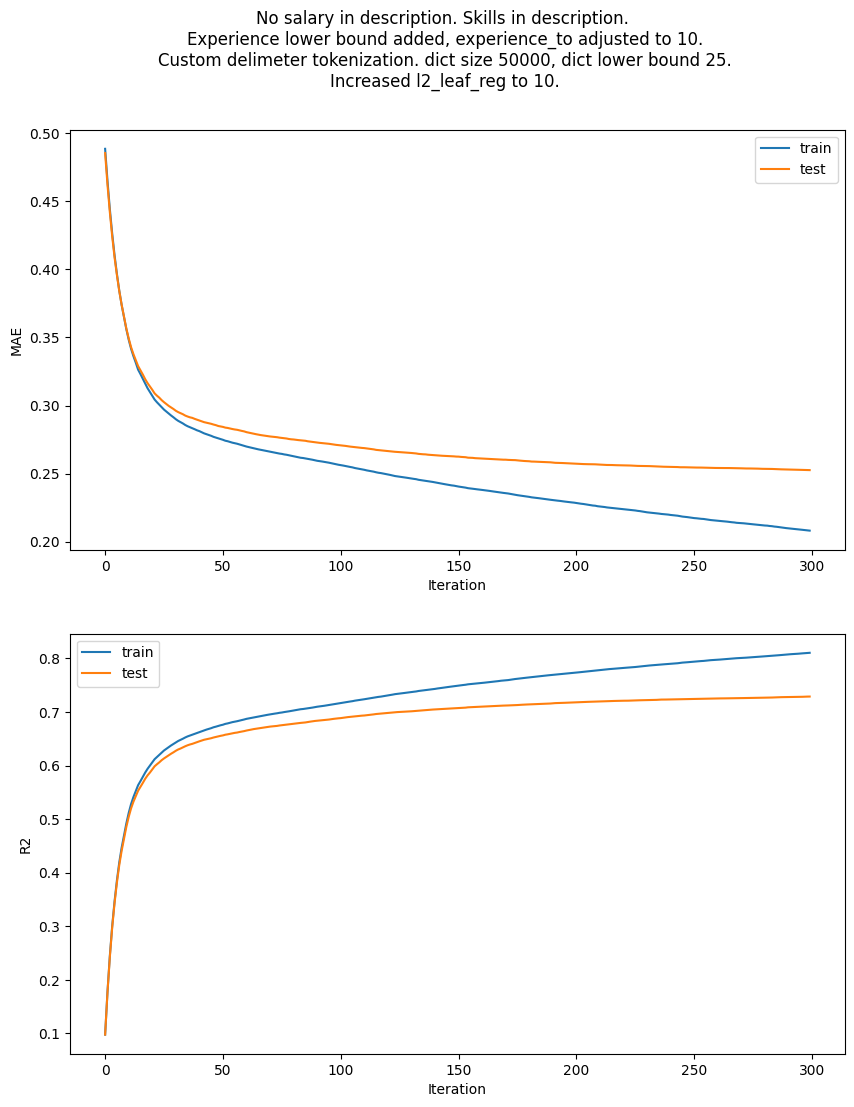

In [111]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

dict_size = 50_000
dict_lower_bound = 25
experiment_name = f"""No salary in description. Skills in description. 
Experience lower bound added, experience_to adjusted to 10.
Custom delimeter tokenization. dict size {dict_size}, dict lower bound {dict_lower_bound}.
Increased l2_leaf_reg to 10."""

text_features = [
'title',
'location',
'company',
'description_no_numbers_with_skills'
]

features = text_features + ['experience_from'] + ['experience_to_adjusted_10']

X = merged_data[features]

y = merged_data['log_salary_from']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_pool = Pool(X_train, y_train, 
                  text_features=text_features
                  )
test_pool = Pool(X_test, y_test, 
                 text_features=text_features
                 )

model = CatBoostRegressor(
    iterations=300,
    depth=10,
    learning_rate=0.1,
    loss_function='RMSE',
    verbose=50,
    eval_metric='R2',
    early_stopping_rounds=10,
    l2_leaf_reg=10,
    custom_metric=[
        'MAE',
        'R2',
        ],
    tokenizers=[{
            "tokenizer_id" : "Space",
            "separator_type" : "ByDelimiter",
            "split_by_set" : "True",
            "delimiter" : '\n -.\t\s/,:;()[]{}!#$*|+=?`"\'_',
            "languages": ['ru', 'en'],
            "number_process_policy":'Replace',
            "number_token":'[NUMBER]',
        }],
    dictionaries = [{
        "dictionary_id" : "BiGram",
        "max_dictionary_size" : f"{dict_size}", # dict size
        "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
        "gram_order" : "2"
    }, {
        "dictionary_id" : "Word",
        "max_dictionary_size" : f"{dict_size}", # dict size
        "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
        "gram_order" : "1"
    }],
    feature_calcers = ["BoW:top_tokens_count=1500"],
    # feature_calcers = ["BoW:top_tokens_count=1000+Word,BiGram|BM25+Word"],
    )

fit_predict(model, train_pool, test_pool, experiment_name)
# for size 1000:
# 200:	learn: 0.7872633	test: 0.7164939	best: 0.7164939 (200)	total: 2m 57s	remaining: 1m 27s

#### Hyperparameter tuning

In [2]:
import pandas as pd

merged_data = pd.read_csv('../data/merged_data_getmatch_hh_unique_with_salary_rur_no_bottom_outliers_log_transformed.csv')
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22224 entries, 0 to 22223
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   title                               22224 non-null  object 
 1   location                            22224 non-null  object 
 2   company                             22224 non-null  object 
 3   skills                              14384 non-null  object 
 4   grade                               1161 non-null   object 
 5   description                         22224 non-null  object 
 6   salary_from                         22224 non-null  float64
 7   salary_to                           10423 non-null  float64
 8   currency                            22224 non-null  object 
 9   source                              22224 non-null  object 
 10  url                                 22224 non-null  object 
 11  experience_from                     22224

In [46]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


dict_size = 50_000
dict_lower_bound = 25
experiment_name = f"""No salary in description. Skills in description. 
Experience lower bound added, experience_to adjusted to 10.
Custom delimeter tokenization. dict size {dict_size}, dict lower bound {dict_lower_bound}.
Increased l2_leaf_reg to 10."""

text_features = [
'title',
'location',
'company',
'description_no_numbers_with_skills'
]

features = text_features + ['experience_from'] + ['experience_to_adjusted_10']

X = merged_data[features]

y = merged_data['log_salary_from']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_pool = Pool(X_train, y_train, 
                  text_features=text_features
                  )
test_pool = Pool(X_test, y_test, 
                 text_features=text_features
                 )


param_grid = {
    # 'iterations': [300, 1000],
    'depth': [4, 10],
    'learning_rate': [0.001, 0.05],
    'l2_leaf_reg': [0, 10],
    "random_strength": [0, 10],
    "bagging_temperature": [0, 10],
}

random_search_model = CatBoostRegressor(
    iterations=1000,
    loss_function='RMSE',
    eval_metric='R2',
    verbose=False,
    custom_metric=[
        'MAE',
        'R2',
        ],
    tokenizers=[{
            "tokenizer_id" : "Space",
            "separator_type" : "ByDelimiter",
            "split_by_set" : "True",
            "delimiter" : '\n -.\t\s/,:;()[]{}!#$*|+=?`"\'_',
            "languages": ['ru', 'en'],
            "number_process_policy":'Replace',
            "number_token":'[NUMBER]',
        }],
    dictionaries = [{
        "dictionary_id" : "BiGram",
        "max_dictionary_size" : f"{dict_size}", # dict size
        "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
        "gram_order" : "2"
    }, {
        "dictionary_id" : "Word",
        "max_dictionary_size" : f"{dict_size}", # dict size
        "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
        "gram_order" : "1"
    }],
    )

random_search_result = random_search_model.randomized_search(
    param_grid, 
    train_pool,
    cv=5,
    n_iter=30, 
    verbose=False,
    partition_random_seed=42,
    shuffle=True,
)


bestTest = -6.545402004
bestIteration = 999


bestTest = 0.4047788626
bestIteration = 996


bestTest = -6.616551173
bestIteration = 999


bestTest = 0.4055794262
bestIteration = 421


bestTest = -6.609423666
bestIteration = 999


bestTest = 0.4061015674
bestIteration = 431


bestTest = -6.65186405
bestIteration = 999


bestTest = 0.4058879506
bestIteration = 978


bestTest = -6.623001014
bestIteration = 999


bestTest = 0.4040276271
bestIteration = 210


bestTest = -6.592322055
bestIteration = 999


bestTest = 0.4039745205
bestIteration = 333


bestTest = -6.658876325
bestIteration = 999


bestTest = 0.404142329
bestIteration = 779


bestTest = -6.545402004
bestIteration = 999


bestTest = 0.4047788626
bestIteration = 996


bestTest = -6.616551173
bestIteration = 999


bestTest = 0.4055794262
bestIteration = 421


bestTest = -6.609423666
bestIteration = 999


bestTest = 0.4061015674
bestIteration = 431


bestTest = -6.65186405
bestIteration = 999


bestTest = 0.4058879506
bestIteratio

In [47]:
params = random_search_result['params']
params

{'bagging_temperature': 0,
 'random_strength': 10,
 'depth': 4,
 'l2_leaf_reg': 0,
 'learning_rate': 0.05}

0:	learn: 0.0080193	test: 0.0080605	best: 0.0080605 (0)	total: 208ms	remaining: 6m 55s
50:	learn: 0.2361409	test: 0.2390008	best: 0.2390008 (50)	total: 12.2s	remaining: 7m 44s
100:	learn: 0.3609245	test: 0.3627927	best: 0.3627927 (100)	total: 24.4s	remaining: 7m 37s
150:	learn: 0.4377043	test: 0.4377371	best: 0.4377371 (150)	total: 36.8s	remaining: 7m 31s
200:	learn: 0.4860090	test: 0.4853421	best: 0.4853421 (200)	total: 50s	remaining: 7m 27s
250:	learn: 0.5175899	test: 0.5157409	best: 0.5157409 (250)	total: 1m 3s	remaining: 7m 19s
300:	learn: 0.5400413	test: 0.5369244	best: 0.5369244 (300)	total: 1m 14s	remaining: 7m 1s
350:	learn: 0.5570186	test: 0.5527795	best: 0.5527795 (350)	total: 1m 27s	remaining: 6m 48s
400:	learn: 0.5711371	test: 0.5659480	best: 0.5659480 (400)	total: 1m 39s	remaining: 6m 36s
450:	learn: 0.5839226	test: 0.5777900	best: 0.5777900 (450)	total: 1m 51s	remaining: 6m 22s
500:	learn: 0.5931336	test: 0.5862338	best: 0.5862338 (500)	total: 2m 2s	remaining: 6m 7s
550:	

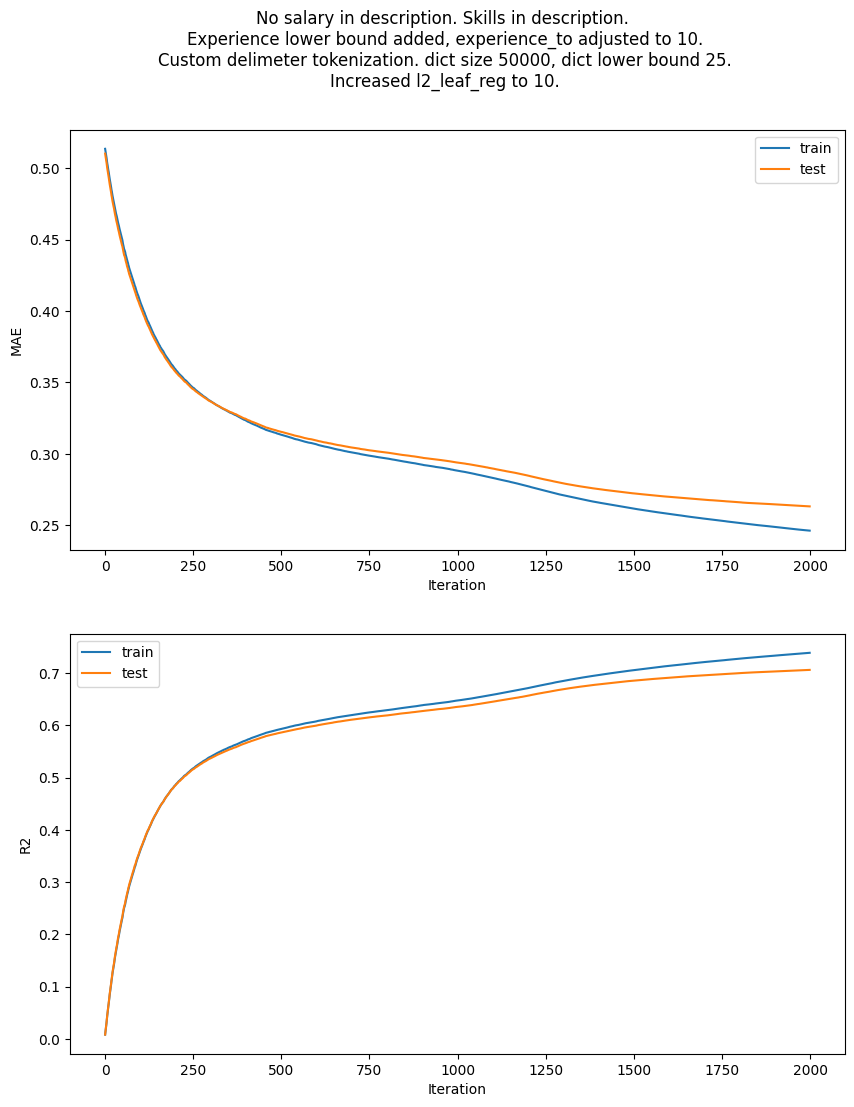

In [62]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

params = {
'bagging_temperature': 0,
 'random_strength': 10,
 'depth': 8,
 'l2_leaf_reg': 5,
 'learning_rate': 0.01}

dict_size = 50_000
dict_lower_bound = 25
experiment_name = f"""No salary in description. Skills in description. 
Experience lower bound added, experience_to adjusted to 10.
Custom delimeter tokenization. dict size {dict_size}, dict lower bound {dict_lower_bound}.
Increased l2_leaf_reg to 10."""

text_features = [
'title',
'location',
'company',
'description_no_numbers_with_skills'
]

features = text_features + ['experience_from'] + ['experience_to_adjusted_10']

X = merged_data[features]

y = merged_data['log_salary_from']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_pool = Pool(X_train, y_train, 
                  text_features=text_features
                  )
test_pool = Pool(X_test, y_test, 
                 text_features=text_features
                 )

model = CatBoostRegressor(
    **params,
    iterations=2000,
    early_stopping_rounds=100,
    loss_function='RMSE',
    verbose=50,
    eval_metric='R2',
    custom_metric=[
        'MAE',
        'R2',
        ],
    tokenizers=[{
            "tokenizer_id" : "Space",
            "separator_type" : "ByDelimiter",
            "split_by_set" : "True",
            "delimiter" : '\n -.\t\s/,:;()[]{}!#$*|+=?`"\'_',
            "languages": ['ru', 'en'],
            "number_process_policy":'Replace',
            "number_token":'[NUMBER]',
        }],
    dictionaries = [{
        "dictionary_id" : "BiGram",
        "max_dictionary_size" : f"{dict_size}", # dict size
        "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
        "gram_order" : "2"
    }, {
        "dictionary_id" : "Word",
        "max_dictionary_size" : f"{dict_size}", # dict size
        "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
        "gram_order" : "1"
    }],
    # feature_calcers = ["BoW:top_tokens_count=1500"],
    # feature_calcers = ["BoW:top_tokens_count=1000+Word,BiGram|BM25+Word"],
    )

fit_predict(model, train_pool, test_pool, experiment_name)
# for size 1000:
# 200:	learn: 0.7872633	test: 0.7164939	best: 0.7164939 (200)	    total: 2m 57s	remaining: 1m 27s

0:	learn: 0.0923021	test: 0.0924854	best: 0.0924854 (0)	total: 844ms	remaining: 4m 12s
50:	learn: 0.6770096	test: 0.6577633	best: 0.6577633 (50)	total: 35.7s	remaining: 2m 54s
100:	learn: 0.7168221	test: 0.6880366	best: 0.6880366 (100)	total: 1m 9s	remaining: 2m 17s
150:	learn: 0.7502573	test: 0.7074195	best: 0.7074195 (150)	total: 1m 43s	remaining: 1m 42s
200:	learn: 0.7747453	test: 0.7175246	best: 0.7175246 (200)	total: 2m 13s	remaining: 1m 5s
250:	learn: 0.7939076	test: 0.7241104	best: 0.7241104 (250)	total: 2m 44s	remaining: 32.1s
299:	learn: 0.8102337	test: 0.7289860	best: 0.7289860 (299)	total: 3m 13s	remaining: 0us

bestTest = 0.7289859875
bestIteration = 299

--------------------------------------------------
R2: 0.7290 at iteration 299
MAE: 0.2510 at iteration 299
--------------------------------------------------


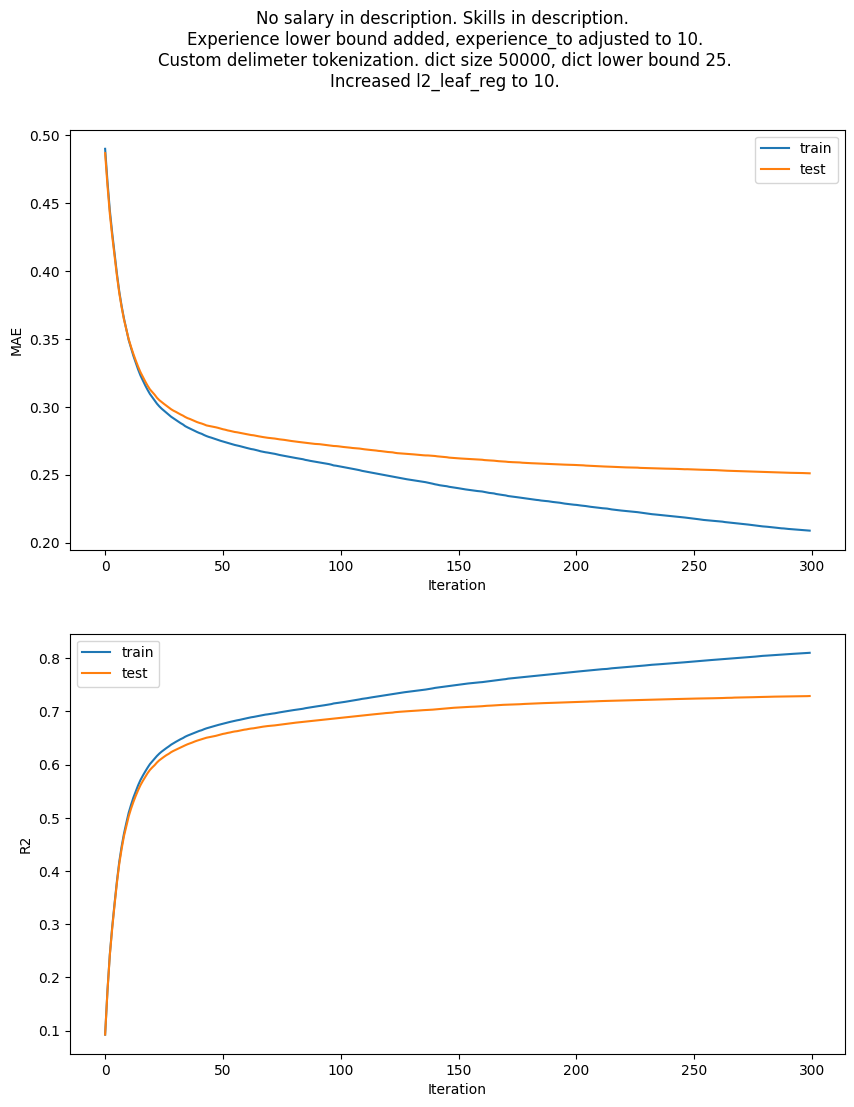

In [59]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

params = {
 'depth': 10,
 'l2_leaf_reg': 10,
 'learning_rate': 0.1
 }

dict_size = 50_000
dict_lower_bound = 25
experiment_name = f"""No salary in description. Skills in description. 
Experience lower bound added, experience_to adjusted to 10.
Custom delimeter tokenization. dict size {dict_size}, dict lower bound {dict_lower_bound}.
Increased l2_leaf_reg to 10."""

text_features = [
'title',
'location',
'company',
'description_no_numbers_with_skills'
]

features = text_features + ['experience_from'] + ['experience_to_adjusted_10']

X = merged_data[features]

y = merged_data['log_salary_from']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_pool = Pool(X_train, y_train, 
                  text_features=text_features
                  )
test_pool = Pool(X_test, y_test, 
                 text_features=text_features
                 )

model = CatBoostRegressor(
    **params,
    iterations=300,
    early_stopping_rounds=100,
    loss_function='RMSE',
    verbose=50,
    eval_metric='R2',
    custom_metric=[
        'MAE',
        'R2',
        ],
    tokenizers=[{
            "tokenizer_id" : "Space",
            "separator_type" : "ByDelimiter",
            "split_by_set" : "True",
            "delimiter" : '\n -.\t\s/,:;()[]{}!#$*|+=?`"\'_',
            "languages": ['ru', 'en'],
            "number_process_policy":'Replace',
            "number_token":'[NUMBER]',
        }],
    dictionaries = [{
        "dictionary_id" : "BiGram",
        "max_dictionary_size" : f"{dict_size}", # dict size
        "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
        "gram_order" : "2"
    }, {
        "dictionary_id" : "Word",
        "max_dictionary_size" : f"{dict_size}", # dict size
        "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
        "gram_order" : "1"
    }],
    # feature_calcers = ["BoW:top_tokens_count=1500"],
    # feature_calcers = ["BoW:top_tokens_count=1000+Word,BiGram|BM25+Word"],
    )

fit_predict(model, train_pool, test_pool, experiment_name)
# for size 1000:
# 200:	learn: 0.7872633	test: 0.7164939	best: 0.7164939 (200)	    total: 2m 57s	remaining: 1m 27s

### To be done

#### Custom TFIDF vectorization (to be done)

Use custom tokenizer, run TFIDF with cutoff, and supply these as features

In [106]:
from sklearn.model_selection import train_test_split


text_features = [
'title',
'location',
'company',
]

auxiliary_features = [
    'description_no_numbers_with_skills',
]

numeric_features = ['experience_from', 'experience_to_adjusted_10']

features = text_features + auxiliary_features + numeric_features

X = merged_data[features]

y = merged_data['log_salary_from']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [107]:
X_train.shape

(17779, 6)

In [108]:
# 1. sklearn TFIDF with CatBoost custom tokenization
from sklearn.feature_extraction.text import TfidfVectorizer
from catboost.text_processing import Tokenizer
from sklearn.model_selection import train_test_split

tokenizer = Tokenizer(
    lowercasing=True,
    languages=['ru', 'en'],
    number_process_policy='Replace',
    number_token='[NUMBER]',
    # separator_type='BySense',
    separator_type='ByDelimiter',
    split_by_set=True,
    delimiter='\n -.\t\s/,:;()[]{}!#$*|+=?`"\'',
)
# run tfidf
tfidf = TfidfVectorizer(
    tokenizer=tokenizer.tokenize,
    max_features=10000,
    ngram_range=(1, 1),
    # stop_words=russian_stopwords,
)

X_train_tfidf = tfidf.fit_transform(X_train['description_no_numbers_with_skills'])
X_test_tfidf = tfidf.transform(X_test['description_no_numbers_with_skills'])

# add tfidf to X_train and X_test
X_train_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf.get_feature_names_out())
X_test_tfidf = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# X_train = pd.concat([X_train, X_train_tfidf], axis=1, ignore_index=True)   
# X_test = pd.concat([X_test, X_test_tfidf], axis=1, ignore_index=True)
print(X_train_tfidf.shape, X_test_tfidf.shape)

/Users/dmitrii.shiriaev/miniconda3/envs/ods-nlp-24-task-2-catboost/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(17779, 10000) (4445, 10000)


In [156]:
X_train_tfidf.head()

,%,&,000р,00ч,10%,100%,15%,1c,1го,1с,...,✅официальное,✓,✔,✔️,✨,❗,⠀,⭐️,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

dict_size = 50_000
dict_lower_bound = 25
experiment_name = f"""No salary in description. Skills in description. 
Experience lower bound added, experience_to adjusted to 10.
Custom delimeter tokenization. dict size {dict_size}, dict lower bound {dict_lower_bound}.
Increased l2_leaf_reg to 10."""

train_pool = Pool(X_train.drop(columns=auxiliary_features),
                  y_train, 
                  text_features=text_features,
                  embedding_features_data=X_train_tfidf,
                  embedding_features=tfidf.get_feature_names_out()
                  )
test_pool = Pool(X_test.drop(columns=auxiliary_features),
                 y_test, 
                 text_features=text_features,
                embedding_features_data=X_test_tfidf,
                embedding_features=tfidf.get_feature_names_out()
                 )

model = CatBoostRegressor(
    iterations=300,
    depth=10,
    learning_rate=0.1,
    loss_function='RMSE',
    verbose=50,
    eval_metric='R2',
    early_stopping_rounds=10,
    l2_leaf_reg=10,
    tokenizers=[{
            "tokenizer_id" : "Space",
            "separator_type" : "ByDelimiter",
            "split_by_set" : "True",
            "delimiter" : '\n -.\t\s/,:;()[]{}!#$*|+=?`"\'_',
            "languages": ['ru', 'en'],
            "number_process_policy":'Replace',
            "number_token":'[NUMBER]',
        }],
    dictionaries = [{
        "dictionary_id" : "BiGram",
        "max_dictionary_size" : f"{dict_size}", # dict size
        "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
        "gram_order" : "2"
    }, {
        "dictionary_id" : "Word",
        "max_dictionary_size" : f"{dict_size}", # dict size
        "occurrence_lower_bound" : f"{dict_lower_bound}", # dict lower bound
        "gram_order" : "1"
    }],
    feature_calcers = ["BoW:top_tokens_count=1500"],
    # feature_calcers = ["BoW:top_tokens_count=1000+Word,BiGram|BM25+Word"],
    )

model.fit(train_pool, eval_set=test_pool)

# get loss on train and test
plt.figure(figsize=(10, 6))
plt.title(experiment_name)
plt.plot(model.evals_result_['learn']['R2'], label='train')
plt.plot(model.evals_result_['validation']['R2'], label='test')
plt.xlabel('Iteration')
plt.ylabel('R2 score')
plt.legend()
plt.show()

# 50:	learn: 0.6267375	test: 0.6196524	best: 0.6196524 (50)	total: 5.97s	remaining: 29.2s

CatBoostError: 'embedding_features_data' must have either 'list' or 'dict' type